# 1. Defining Problem Statement and Analysing Basic Metrics

## Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv("/Users/vidish/Desktop/dev/python/jupyter_notebooks/business_cases/case3_walmart/walmart_data.csv")
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Creating separate dataframes for each Gender:

In [3]:
df_female = df[df["Gender"] == "F"]
df_male = df[df["Gender"] == "M"]
df_female.reset_index(drop = True, inplace = True)
df_male.reset_index(drop = True, inplace = True)

In [4]:
df_female.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [5]:
df_male.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000002,P00285442,M,55+,16,C,4+,0,8,7969
1,1000003,P00193542,M,26-35,15,A,3,0,1,15227
2,1000004,P00184942,M,46-50,7,B,2,1,1,19215
3,1000004,P00346142,M,46-50,7,B,2,1,1,15854
4,1000004,P0097242,M,46-50,7,B,2,1,1,15686


## 1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

### Descriptive Analytics (Overall Data)

In [6]:
df.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.shape

(550068, 10)

### Descriptive Analytics (Female Only)

In [9]:
df_female.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,1.358090e+05,135809,135809,135809,135809.000000,135809,135809,135809.000000,135809.000000,135809.000000
unique,NaN,3367,1,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,F,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,508,135809,50752,NaN,57796,51298,NaN,NaN,NaN
mean,1.003130e+06,NaN,NaN,NaN,6.740540,NaN,NaN,0.419619,5.717714,8734.565765
std,1.786631e+03,NaN,NaN,NaN,6.239639,NaN,NaN,0.493498,3.696752,4767.233289
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001569e+06,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,3.000000,5433.000000
50%,1.003159e+06,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000,5.000000,7914.000000
75%,1.004765e+06,NaN,NaN,NaN,11.000000,NaN,NaN,1.000000,8.000000,11400.000000


In [10]:
df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135809 entries, 0 to 135808
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     135809 non-null  int64 
 1   Product_ID                  135809 non-null  object
 2   Gender                      135809 non-null  object
 3   Age                         135809 non-null  object
 4   Occupation                  135809 non-null  int64 
 5   City_Category               135809 non-null  object
 6   Stay_In_Current_City_Years  135809 non-null  object
 7   Marital_Status              135809 non-null  int64 
 8   Product_Category            135809 non-null  int64 
 9   Purchase                    135809 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 10.4+ MB


In [11]:
df_female.shape

(135809, 10)

### Descriptive Analytics (Male Only)

In [12]:
df_male.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,4.142590e+05,414259,414259,414259,414259.00000,414259,414259,414259.000000,414259.000000,414259.00000
unique,NaN,3588,1,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1372,414259,168835,NaN,173377,142523,NaN,NaN,NaN
mean,1.002996e+06,NaN,NaN,NaN,8.51475,NaN,NaN,0.406386,5.301512,9437.52604
std,1.706494e+03,NaN,NaN,NaN,6.55379,NaN,NaN,0.491159,4.006275,5092.18621
min,1.000002e+06,NaN,NaN,NaN,0.00000,NaN,NaN,0.000000,1.000000,12.00000
25%,1.001505e+06,NaN,NaN,NaN,3.00000,NaN,NaN,0.000000,1.000000,5863.00000
50%,1.003041e+06,NaN,NaN,NaN,7.00000,NaN,NaN,0.000000,5.000000,8098.00000
75%,1.004411e+06,NaN,NaN,NaN,15.00000,NaN,NaN,1.000000,8.000000,12454.00000


In [13]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414259 entries, 0 to 414258
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     414259 non-null  int64 
 1   Product_ID                  414259 non-null  object
 2   Gender                      414259 non-null  object
 3   Age                         414259 non-null  object
 4   Occupation                  414259 non-null  int64 
 5   City_Category               414259 non-null  object
 6   Stay_In_Current_City_Years  414259 non-null  object
 7   Marital_Status              414259 non-null  int64 
 8   Product_Category            414259 non-null  int64 
 9   Purchase                    414259 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 31.6+ MB


In [14]:
df_male.shape

(414259, 10)

## 1.2 Non-Graphical Analysis: Value counts and Unique Attributes

### Value Counts for Overall Data

In [15]:
user_id_count_overall = df["User_ID"].value_counts().sort_values(ascending = False)
user_id_count_overall = pd.DataFrame(user_id_count_overall).reset_index()
user_id_count_overall

,User_ID,count
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823
...,...,...
5886,1002690,7
5887,1002111,7
5888,1005810,7
5889,1004991,7


In [16]:
product_id_count_overall = df["Product_ID"].value_counts().sort_values(ascending = False)
product_id_count_overall = pd.DataFrame(product_id_count_overall).reset_index()
product_id_count_overall

,Product_ID,count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
...,...,...
3626,P00335642,1
3627,P00341542,1
3628,P00077242,1
3629,P00315142,1


In [17]:
gender_count_overall = df["Gender"].value_counts().sort_values(ascending = False)
gender_count_overall = pd.DataFrame(gender_count_overall).reset_index()
gender_count_overall

,Gender,count
0,M,414259
1,F,135809


In [18]:
age_group_count_overall = df["Age"].value_counts().sort_values(ascending = False)
age_group_count_overall = pd.DataFrame(age_group_count_overall).reset_index()
age_group_count_overall

,Age,count
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501
5,55+,21504
6,0-17,15102


In [19]:
occupation_count_overall = df["Occupation"].value_counts().sort_values(ascending = False)
occupation_count_overall = pd.DataFrame(occupation_count_overall).reset_index()
occupation_count_overall

,Occupation,count
0,4,72308
1,0,69638
2,7,59133
3,1,47426
4,17,40043
5,20,33562
6,12,31179
7,14,27309
8,2,26588
9,16,25371


In [20]:
city_category_count_overall = df["City_Category"].value_counts().sort_values(ascending = False)
city_category_count_overall = pd.DataFrame(city_category_count_overall).reset_index()
city_category_count_overall

,City_Category,count
0,B,231173
1,C,171175
2,A,147720


In [21]:
stay_in_current_city_count_overall = df["Stay_In_Current_City_Years"].value_counts().sort_values(ascending = False)
stay_in_current_city_count_overall = pd.DataFrame(stay_in_current_city_count_overall).reset_index()
stay_in_current_city_count_overall

,Stay_In_Current_City_Years,count
0,1,193821
1,2,101838
2,3,95285
3,4+,84726
4,0,74398


In [22]:
marital_status_count_overall = df["Marital_Status"].value_counts().sort_values(ascending = False)
marital_status_count_overall = pd.DataFrame(marital_status_count_overall).reset_index()
marital_status_count_overall

,Marital_Status,count
0,0,324731
1,1,225337


In [23]:
product_category_count_overall = df["Product_Category"].value_counts().sort_values(ascending = False)
product_category_count_overall = pd.DataFrame(product_category_count_overall).reset_index()
product_category_count_overall

,Product_Category,count
0,5,150933
1,1,140378
2,8,113925
3,11,24287
4,2,23864
5,6,20466
6,3,20213
7,4,11753
8,16,9828
9,15,6290


In [24]:
purchase_counts_overall = df["Purchase"].value_counts().sort_values(ascending = False)
purchase_counts_overall = pd.DataFrame(purchase_counts_overall).reset_index()
purchase_counts_overall

,Purchase,count
0,7011,191
1,7193,188
2,6855,187
3,6891,184
4,7012,183
...,...,...
18100,14837,1
18101,14890,1
18102,4849,1
18103,4852,1


### Value Counts for Female Customers

In [25]:
user_id_count_female = df_female["User_ID"].value_counts().sort_values(ascending = False)
user_id_count_female = pd.DataFrame(user_id_count_female).reset_index()
user_id_count_female

,User_ID,count
0,1001150,752
1,1001088,680
2,1003224,622
3,1003539,617
4,1005643,573
...,...,...
1661,1003291,8
1662,1002488,8
1663,1005904,8
1664,1002965,8


In [26]:
product_id_count_female = df_female["Product_ID"].value_counts().sort_values(ascending = False)
product_id_count_female = pd.DataFrame(product_id_count_female).reset_index()
product_id_count_female

,Product_ID,count
0,P00265242,508
1,P00220442,440
2,P00058042,387
3,P00255842,375
4,P00110742,365
...,...,...
3362,P00201242,1
3363,P00153042,1
3364,P00272442,1
3365,P00164242,1


In [27]:
gender_count_female = df_female["Gender"].value_counts().sort_values(ascending = False)
gender_count_female = pd.DataFrame(gender_count_female).reset_index()
gender_count_female

,Gender,count
0,F,135809


In [28]:
age_group_count_female = df_female["Age"].value_counts().sort_values(ascending = False)
age_group_count_female = pd.DataFrame(age_group_count_female).reset_index()
age_group_count_female

,Age,count
0,26-35,50752
1,36-45,27170
2,18-25,24628
3,46-50,13199
4,51-55,9894
5,0-17,5083
6,55+,5083


In [29]:
occupation_count_female = df_female["Occupation"].value_counts().sort_values(ascending = False)
occupation_count_female = pd.DataFrame(occupation_count_female).reset_index()
occupation_count_female

,Occupation,count
0,0,18112
1,1,17984
2,4,17836
3,7,10028
4,20,8811
5,2,8629
6,6,8160
7,3,7919
8,14,6763
9,9,5843


In [30]:
city_category_count_female = df_female["City_Category"].value_counts().sort_values(ascending = False)
city_category_count_female = pd.DataFrame(city_category_count_female).reset_index()
city_category_count_female

,City_Category,count
0,B,57796
1,C,42309
2,A,35704


In [31]:
stay_in_current_city_count_female = df_female["Stay_In_Current_City_Years"].value_counts().sort_values(ascending = False)
stay_in_current_city_count_female = pd.DataFrame(stay_in_current_city_count_female).reset_index()
stay_in_current_city_count_female

,Stay_In_Current_City_Years,count
0,1,51298
1,3,24520
2,2,24332
3,4+,18596
4,0,17063


In [32]:
marital_status_count_female = df_female["Marital_Status"].value_counts().sort_values(ascending = False)
marital_status_count_female = pd.DataFrame(marital_status_count_female).reset_index()
marital_status_count_female

,Marital_Status,count
0,0,78821
1,1,56988


In [33]:
product_category_count_female = df_female["Product_Category"].value_counts().sort_values(ascending = False)
product_category_count_female = pd.DataFrame(product_category_count_female).reset_index()
product_category_count_female

,Product_Category,count
0,5,41961
1,8,33558
2,1,24831
3,3,6006
4,2,5658
5,11,4739
6,6,4559
7,4,3639
8,16,2402
9,12,1532


In [34]:
purchase_counts_female = df_female["Purchase"].value_counts().sort_values(ascending = False)
purchase_counts_female = pd.DataFrame(purchase_counts_female).reset_index()
purchase_counts_female

,Purchase,count
0,7108,68
1,6879,65
2,6856,65
3,7060,63
4,6938,63
...,...,...
14699,14665,1
14700,18781,1
14701,3811,1
14702,12213,1


### Value Counts for Male Customers

In [35]:
user_id_count_male = df_male["User_ID"].value_counts().sort_values(ascending = False)
user_id_count_male = pd.DataFrame(user_id_count_male).reset_index()
user_id_count_male

,User_ID,count
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823
...,...,...
4220,1005810,7
4221,1002111,7
4222,1005391,7
4223,1000094,7


In [36]:
product_id_count_male = df_male["Product_ID"].value_counts().sort_values(ascending = False)
product_id_count_male = pd.DataFrame(product_id_count_male).reset_index()
product_id_count_male

,Product_ID,count
0,P00265242,1372
1,P00025442,1267
2,P00110742,1247
3,P00112142,1223
4,P00057642,1212
...,...,...
3583,P00352042,1
3584,P00301442,1
3585,P00132742,1
3586,P00053242,1


In [37]:
gender_count_male = df_male["Gender"].value_counts().sort_values(ascending = False)
gender_count_male = pd.DataFrame(gender_count_male).reset_index()
gender_count_male

,Gender,count
0,M,414259


In [38]:
age_group_count_male = df_male["Age"].value_counts().sort_values(ascending = False)
age_group_count_male = pd.DataFrame(age_group_count_male).reset_index()
age_group_count_male

,Age,count
0,26-35,168835
1,36-45,82843
2,18-25,75032
3,46-50,32502
4,51-55,28607
5,55+,16421
6,0-17,10019


In [39]:
occupation_count_male = df_male["Occupation"].value_counts().sort_values(ascending = False)
occupation_count_male = pd.DataFrame(occupation_count_male).reset_index()
occupation_count_male

,Occupation,count
0,4,54472
1,0,51526
2,7,49105
3,17,36114
4,1,29442
5,12,27710
6,20,24751
7,16,21264
8,14,20546
9,2,17959


In [40]:
city_category_count_male = df_male["City_Category"].value_counts().sort_values(ascending = False)
city_category_count_male = pd.DataFrame(city_category_count_male).reset_index()
city_category_count_male

,City_Category,count
0,B,173377
1,C,128866
2,A,112016


In [41]:
stay_in_current_city_count_male = df_male["Stay_In_Current_City_Years"].value_counts().sort_values(ascending = False)
stay_in_current_city_count_male = pd.DataFrame(stay_in_current_city_count_male).reset_index()
stay_in_current_city_count_male

,Stay_In_Current_City_Years,count
0,1,142523
1,2,77506
2,3,70765
3,4+,66130
4,0,57335


In [42]:
marital_status_count_male = df_male["Marital_Status"].value_counts().sort_values(ascending = False)
marital_status_count_male = pd.DataFrame(marital_status_count_male).reset_index()
marital_status_count_male

,Marital_Status,count
0,0,245910
1,1,168349


In [43]:
product_category_count_male = df_male["Product_Category"].value_counts().sort_values(ascending = False)
product_category_count_male = pd.DataFrame(product_category_count_male).reset_index()
product_category_count_male

,Product_Category,count
0,1,115547
1,5,108972
2,8,80367
3,11,19548
4,2,18206
5,6,15907
6,3,14207
7,4,8114
8,16,7426
9,15,5244


In [44]:
purchase_counts_male = df_male["Purchase"].value_counts().sort_values(ascending = False)
purchase_counts_male = pd.DataFrame(purchase_counts_male).reset_index()
purchase_counts_male

,Purchase,count
0,6855,144
1,7011,138
2,6923,138
3,6891,136
4,7193,136
...,...,...
17542,18746,1
17543,23605,1
17544,18513,1
17545,6395,1


### Unique Attributes for Female Customers

In [45]:
unique_user_id_female = df_female["User_ID"].unique()
print(f"The following is the list of Unique User IDs of Female Customers = \n{unique_user_id_female}")
nunique_user_id_female = df_female["User_ID"].nunique()
print(f"The total number of unique User IDs of Female Customers = {nunique_user_id_female}")

The following is the list of Unique User IDs of Female Customers = 
[1000001 1000006 1000010 ... 1000703 1004293 1004588]
The total number of unique User IDs of Female Customers = 1666


In [46]:
unique_product_id_female = df_female["Product_ID"].unique()
print(f"The following is the list of Unique Product IDs of the Products purchased by Female Customers = \n{unique_product_id_female}")
nunique_product_id_female = df_female["Product_ID"].nunique()
print(f"The total number of unique Product IDs purchased by Female Customers = {nunique_product_id_female}")

The following is the list of Unique Product IDs of the Products purchased by Female Customers = 
['P00069042' 'P00248942' 'P00087842' ... 'P00371644' 'P00372445'
 'P00370853']
The total number of unique Product IDs purchased by Female Customers = 3367


In [47]:
unique_age_group_female = df_female["Age"].unique()
print(f"The following is the list of unique Age Groups that Female Customers belong to = \n{unique_age_group_female}")
nunique_age_group_female = df_female["Age"].nunique()
print(f"The total number of unique Age Groups that Female Customers belong to = {nunique_age_group_female}")

The following is the list of unique Age Groups that Female Customers belong to = 
['0-17' '51-55' '36-45' '26-35' '18-25' '46-50' '55+']
The total number of unique Age Groups that Female Customers belong to = 7


In [48]:
unique_occupation_female = df_female["Occupation"].unique()
print(f"The following is the list of unique Occupations of the Female Customers = \n{unique_occupation_female}")
nunique_occupation_female = df_female["Occupation"].nunique()
print(f"The total number of unique Occupations of Female Customers = {nunique_occupation_female}")

The following is the list of unique Occupations of the Female Customers = 
[10  9  1  0  3  7  4 16  2  5 11  6 20 17 15 14 12 13  8 19 18]
The total number of unique Occupations of Female Customers = 21


In [49]:
unique_city_category_female = df["City_Category"].unique()
print(f"The following is the list of unique City Categories that the Female Customers live in = \n{unique_city_category_female}")
nunique_city_category_female = df["City_Category"].nunique()
print(f"The total number of unique City Categories that the Female Customers live in = {nunique_city_category_female}")

The following is the list of unique City Categories that the Female Customers live in = 
['A' 'C' 'B']
The total number of unique City Categories that the Female Customers live in = 3


In [50]:
unique_stay_in_current_city_female = df_female["Stay_In_Current_City_Years"].unique()
print(f"The following is the list of unique number of years Female Customers have stayed in a city for = \n{unique_stay_in_current_city_female}")
nunique_stay_in_current_city_female = df_female["Stay_In_Current_City_Years"].nunique()
print(f"The total number of unique years that Female Customers have stayed in a city for = {nunique_stay_in_current_city_female}")

The following is the list of unique number of years Female Customers have stayed in a city for = 
['2' '1' '4+' '0' '3']
The total number of unique years that Female Customers have stayed in a city for = 5


In [51]:
unique_marital_status_female = df_female["Marital_Status"].unique()
print(f"The following is the list of unique Marital Status of the Female Customers = \n{unique_marital_status_female}")
nunique_marital_status_female = df_female["Marital_Status"].nunique()
print(f"The total number of unique Marital Status of Female Customers = {nunique_marital_status_female}")
print("Where 0 is Unmarried, and 1 is Married.")

The following is the list of unique Marital Status of the Female Customers = 
[0 1]
The total number of unique Marital Status of Female Customers = 2
Where 0 is Unmarried, and 1 is Married.


In [52]:
unique_product_category_female = df_female["Product_Category"].unique()
print(f"The following is the list containing all the unique Product Categories that Female Customers purchased from = \n{unique_product_category_female}")
nunique_product_category_female = df_female["Product_Category"].nunique()
print(f"The total number of unique product categories that Female Customers purchased from = {nunique_product_category_female}")

The following is the list containing all the unique Product Categories that Female Customers purchased from = 
[ 3  1 12  5  4  2  8 14  6 13 11 15  7 10 16 18  9 17 20 19]
The total number of unique product categories that Female Customers purchased from = 20


In [53]:
unique_purchase_female = df_female["Purchase"].unique()
print(f"The following is the list of unique purchase amounts spent by the Female Customers = \n{unique_purchase_female}")
nunique_purchase_female = df_female["Purchase"].nunique()
print(f"The following at the total number of purchases made by the Female Customers = {nunique_purchase_female}")
min_purchase_female = df_female["Purchase"].min()
print(f"The smallest amount spent on Purchase made by Female Customers = {min_purchase_female}")
max_purchase_female = df_female["Purchase"].max()
print(f"The largest amount spent on Purchase made by Female Customers = {max_purchase_female}")
sum_purchases_female = df_female["Purchase"].sum()
print(f"The total amount spent on Purchases made by all the Female Customers = {sum_purchases_female}")
mean_purchase_female = df_female["Purchase"].mean()
print(f"The average amount spent on Purchases made by Female Customers = {mean_purchase_female}")

The following is the list of unique purchase amounts spent by the Female Customers = 
[ 8370 15200  1422 ...   605   123   477]
The following at the total number of purchases made by the Female Customers = 14704
The smallest amount spent on Purchase made by Female Customers = 12
The largest amount spent on Purchase made by Female Customers = 23959
The total amount spent on Purchases made by all the Female Customers = 1186232642
The average amount spent on Purchases made by Female Customers = 8734.565765155476


### Unique Attributes for Male Customers

In [54]:
unique_user_id_male = df_male["User_ID"].unique()
print(f"The following is the list of Unique User IDs of Male Customers = \n{unique_user_id_male}")
nunique_user_id_male = df_male["User_ID"].nunique()
print(f"The total number of unique User IDs of Male Customers = {nunique_user_id_male}")

The following is the list of Unique User IDs of Male Customers = 
[1000002 1000003 1000004 ... 1004113 1005391 1001529]
The total number of unique User IDs of Male Customers = 4225


In [55]:
unique_product_id_male = df_male["Product_ID"].unique()
print(f"The following is the list of Unique Product IDs of the Products purchased by Male Customers = \n{unique_product_id_male}")
nunique_product_id_male = df_male["Product_ID"].nunique()
print(f"The total number of unique Product IDs purchased by Male Customers = {nunique_product_id_male}")

The following is the list of Unique Product IDs of the Products purchased by Male Customers = 
['P00285442' 'P00193542' 'P00184942' ... 'P00370293' 'P00370853'
 'P00371644']
The total number of unique Product IDs purchased by Male Customers = 3588


In [56]:
unique_age_group_male = df_male["Age"].unique()
print(f"The following is the list of unique Age Groups that Male Customers belong to = \n{unique_age_group_male}")
nunique_age_group_male = df_male["Age"].nunique()
print(f"The total number of unique Age Groups that Male Customers belong to = {nunique_age_group_male}")

The following is the list of unique Age Groups that Male Customers belong to = 
['55+' '26-35' '46-50' '36-45' '51-55' '0-17' '18-25']
The total number of unique Age Groups that Male Customers belong to = 7


In [57]:
unique_occupation_male = df_male["Occupation"].unique()
print(f"The following is the list of unique Occupations of the Male Customers = \n{unique_occupation_male}")
nunique_occupation_male = df_male["Occupation"].nunique()
print(f"The total number of unique Occupations of Male Customers = {nunique_occupation_male}")

The following is the list of unique Occupations of the Male Customers = 
[16 15  7 20  1 12 17  0 10  4 11  3  8 19  2 18 14 13  9  6  5]
The total number of unique Occupations of Male Customers = 21


In [58]:
unique_city_category_male = df["City_Category"].unique()
print(f"The following is the list of unique City Categories that the Male Customers live in = \n{unique_city_category_male}")
nunique_city_category_male = df["City_Category"].nunique()
print(f"The total number of unique City Categories that the Male Customers live in = {nunique_city_category_male}")

The following is the list of unique City Categories that the Male Customers live in = 
['A' 'C' 'B']
The total number of unique City Categories that the Male Customers live in = 3


In [59]:
unique_stay_in_current_city_male = df_male["Stay_In_Current_City_Years"].unique()
print(f"The following is the list of unique number of years Male Customers have stayed in a city for = \n{unique_stay_in_current_city_male}")
nunique_stay_in_current_city_male = df_male["Stay_In_Current_City_Years"].nunique()
print(f"The total number of unique years that Male Customers have stayed in a city for = {nunique_stay_in_current_city_male}")

The following is the list of unique number of years Male Customers have stayed in a city for = 
['4+' '3' '2' '1' '0']
The total number of unique years that Male Customers have stayed in a city for = 5


In [60]:
unique_marital_status_male = df_male["Marital_Status"].unique()
print(f"The following is the list of unique Marital Status of the Male Customers = \n{unique_marital_status_male}")
nunique_marital_status_male = df_male["Marital_Status"].nunique()
print(f"The total number of unique Marital Status of Male Customers = {nunique_marital_status_male}")
print("Where 0 is Unmarried, and 1 is Married.")

The following is the list of unique Marital Status of the Male Customers = 
[0 1]
The total number of unique Marital Status of Male Customers = 2
Where 0 is Unmarried, and 1 is Married.


In [61]:
unique_product_category_male = df_male["Product_Category"].unique()
print(f"The following is the list containing all the unique Product Categories that Male Customers purchased from = \n{unique_product_category_male}")
nunique_product_category_male = df_male["Product_Category"].nunique()
print(f"The total number of unique product categories that Male Customers purchased from = {nunique_product_category_male}")

The following is the list containing all the unique Product Categories that Male Customers purchased from = 
[ 8  1  5  6  3 11  2 13 15  4  7 16 18 12 10 14 17  9 20 19]
The total number of unique product categories that Male Customers purchased from = 20


In [62]:
unique_purchase_male = df_male["Purchase"].unique()
print(f"The following is the list of unique purchase amounts spent by the Male Customers = \n{unique_purchase_male}")
nunique_purchase_male = df_male["Purchase"].nunique()
print(f"The following at the total number of purchases made by the Male Customers = {nunique_purchase_male}")
min_purchase_male = df_male["Purchase"].min()
print(f"The smallest amount spent on Purchase made by Male Customers = {min_purchase_male}")
max_purchase_male = df_male["Purchase"].max()
print(f"The largest amount spent on Purchase made by Male Customers = {max_purchase_male}")
sum_purchases_male = df_male["Purchase"].sum()
print(f"The total amount spent on Purchases made by all the Male Customers = {sum_purchases_male}")
mean_purchase_male = df_male["Purchase"].mean()
print(f"The average amount spent on Purchases made by Male Customers = {mean_purchase_male}")

The following is the list of unique purchase amounts spent by the Male Customers = 
[ 7969 15227 19215 ...   244   484   240]
The following at the total number of purchases made by the Male Customers = 17547
The smallest amount spent on Purchase made by Male Customers = 12
The largest amount spent on Purchase made by Male Customers = 23961
The total amount spent on Purchases made by all the Male Customers = 3909580100
The average amount spent on Purchases made by Male Customers = 9437.526040472265


### Relationship Between the Variables

In [63]:
# marginal relationship between Gender and Purchase
gender_purchase_marginal_relationship = df.groupby("Gender")["Purchase"].mean()
print("Marginal Relationship between Gender and Purchase:")
print(gender_purchase_marginal_relationship)
# conditional relationship between gender and purchase
gender_purchase_conditional_relationship = df.groupby('Gender')['Purchase'].mean()
print("Conditional Relationship between Gender and Purchase:")
print(gender_purchase_conditional_relationship)

Marginal Relationship between Gender and Purchase:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64
Conditional Relationship between Gender and Purchase:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


In [64]:
# marginal relationship between age and purchase
age_purchase_marginal_relationship = df.groupby('Age')['Purchase'].mean()
print("Marginal Relationship between Age and Purchase:")
print(age_purchase_marginal_relationship)
# conditional relationship between age and purchase
age_purchase_conditional_relationship = df.groupby(['Age', 'Gender'])['Purchase'].mean()
print("\nConditional Relationship between Age and Purchase:")
print(age_purchase_conditional_relationship)

Marginal Relationship between Age and Purchase:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

Conditional Relationship between Age and Purchase:
Age    Gender
0-17   F         8338.771985
       M         9235.173670
18-25  F         8343.180201
       M         9440.942971
26-35  F         8728.251754
       M         9410.337578
36-45  F         8959.844056
       M         9453.193643
46-50  F         8842.098947
       M         9357.471509
51-55  F         9042.449666
       M         9705.094802
55+    F         9007.036199
       M         9438.195603
Name: Purchase, dtype: float64


In [65]:
# marginal relationship between occupation and purchase
occupation_purchase_marginal_relationship = df.groupby('Occupation')['Purchase'].mean()
print("Marginal Relationship between Occupation and Purchase:")
print(occupation_purchase_marginal_relationship)
# conditional relationship between occupation and purchase
occupation_purchase_conditional_relationship = df.groupby(['Occupation', 'Gender'])['Purchase'].mean()
print("\nConditional Relationship between Occupation and Purchase:")
print(occupation_purchase_conditional_relationship)

Marginal Relationship between Occupation and Purchase:
Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

Conditional Relationship between Occupation and Purchase:
Occupation  Gender
0           F          8827.508447
            M          9228.799538
1           F          8496.815280
            M          9231.961755
2           F          8409.951327
            M          9213.158472
3           F          9055.138149
            M          9279.059603
4           F          8536.909677
            M          9435.676366
5           F          8826.599099
            M          9446.089083
6           F          9078

In [66]:
# marginal relationship between city category and purchase
city_category_purchase_marginal_relationship = df.groupby('City_Category')['Purchase'].mean()
print("Marginal Relationship between City Category and Purchase:")
print(city_category_purchase_marginal_relationship)
# conditional relationship between city category and purchase
city_category_purchase_conditional_relationship = df.groupby(['City_Category', 'Gender'])['Purchase'].mean()
print("\nConditional Relationship between City Category and Purchase:")
print(city_category_purchase_conditional_relationship)

Marginal Relationship between City Category and Purchase:
City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

Conditional Relationship between City Category and Purchase:
City_Category  Gender
A              F         8579.708576
               M         9017.834470
B              F         8540.677694
               M         9354.854433
C              F         9130.107518
               M         9913.567248
Name: Purchase, dtype: float64


In [67]:
# marginal relationship between Stay_In_Current_City_Years and Purchase
stay_in_city_purchase_marginal_relationship = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
print("Marginal Relationship between Stay_In_Current_City_Years and Purchase:")
print(stay_in_city_purchase_marginal_relationship)
# conditional relationship between Stay_In_Current_City_Years and Purchase
stay_in_city_purchase_conditional_relationship = df.groupby(['Stay_In_Current_City_Years', 'Gender'])['Purchase'].mean()
print("\nConditional Relationship between Stay_In_Current_City_Years and Purchase:")
print(stay_in_city_purchase_conditional_relationship)

Marginal Relationship between Stay_In_Current_City_Years and Purchase:
Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

Conditional Relationship between Stay_In_Current_City_Years and Purchase:
Stay_In_Current_City_Years  Gender
0                           F         8606.040497
                            M         9350.908869
1                           F         8775.052244
                            M         9421.145380
2                           F         8740.516357
                            M         9502.486091
3                           F         8695.236582
                            M         9491.916315
4+                          F         8784.883738
                            M         9413.589778
Name: Purchase, dtype: float64


In [68]:
# marginal relationship between marital status and purchase
marital_status_purchase_marginal_relationship = df.groupby('Marital_Status')['Purchase'].mean()
print("Marginal Relationship between Marital Status and Purchase:")
print(marital_status_purchase_marginal_relationship)
# conditional relationship between marital status and purchase
marital_status_purchase_conditional_relationship = df.groupby(['Marital_Status', 'Gender'])['Purchase'].mean()
print("\nConditional Relationship between Marital Status and Purchase:")
print(marital_status_purchase_conditional_relationship)

Marginal Relationship between Marital Status and Purchase:
Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

Conditional Relationship between Marital Status and Purchase:
Marital_Status  Gender
0               F         8679.845815
                M         9453.756740
1               F         8810.249789
                M         9413.817605
Name: Purchase, dtype: float64


## 1.3 Visual Analysis - Univariate & Bivariate

### Visual Analytics for Female Customers

/var/folders/7t/wnyn31qs37gg4xdxsbzlpmrh0000gn/T/ipykernel_89377/977097040.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_female[column], kde = False)


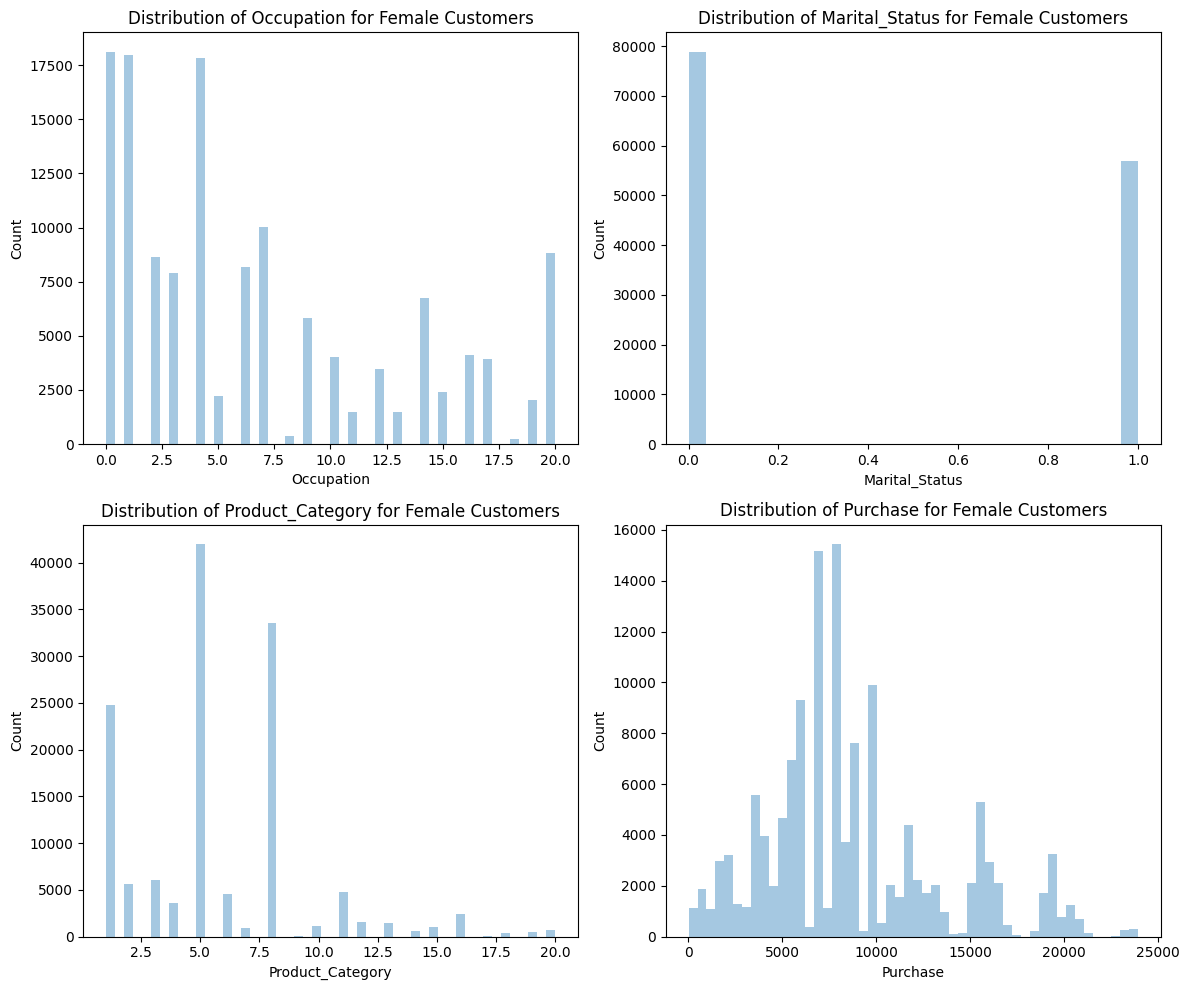

In [69]:
# distplot for numerical data for female customers
#df_female.info()
numerical_columns = ["Occupation", "Marital_Status", "Product_Category", "Purchase"]
plt.figure(figsize = (12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.distplot(df_female[column], kde = False)
    plt.title(f"Distribution of {column} for Female Customers")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

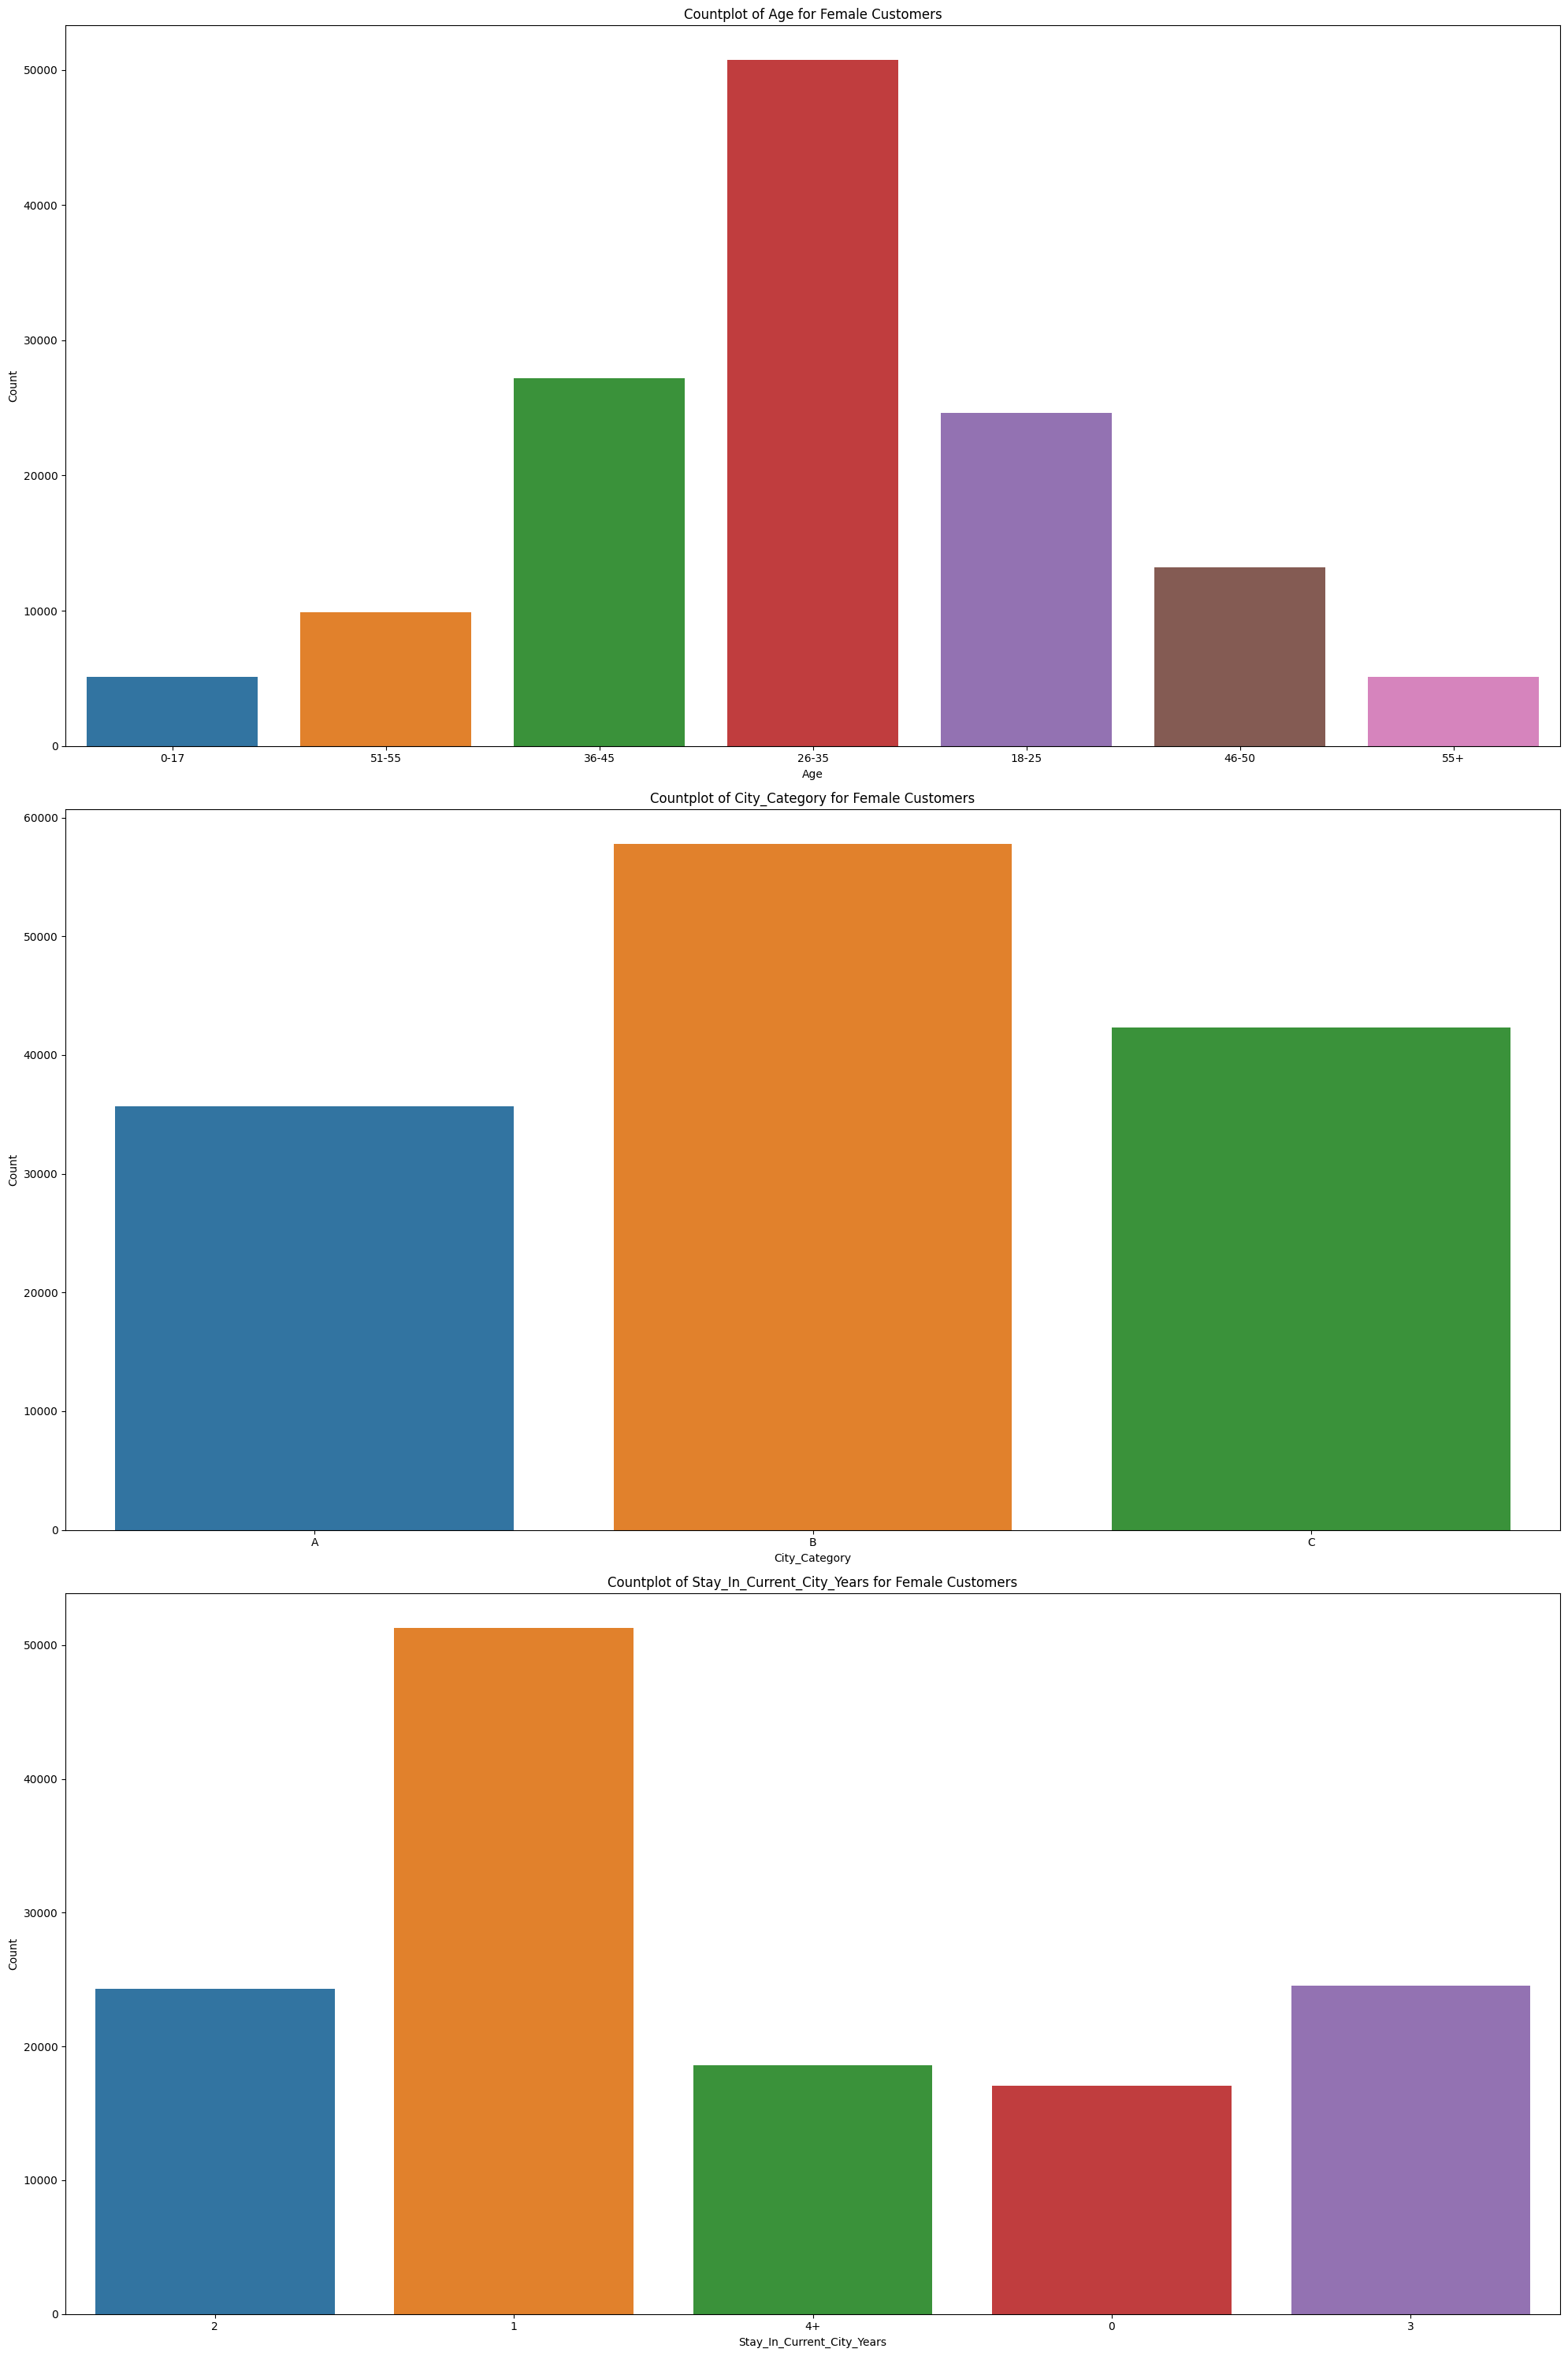

In [70]:
# countplot for categorical data for female customers
categorical_columns = ["Age", "City_Category", "Stay_In_Current_City_Years"]
plt.figure(figsize = (20, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(data = df_female, x = column)
    plt.title(f"Countplot of {column} for Female Customers")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

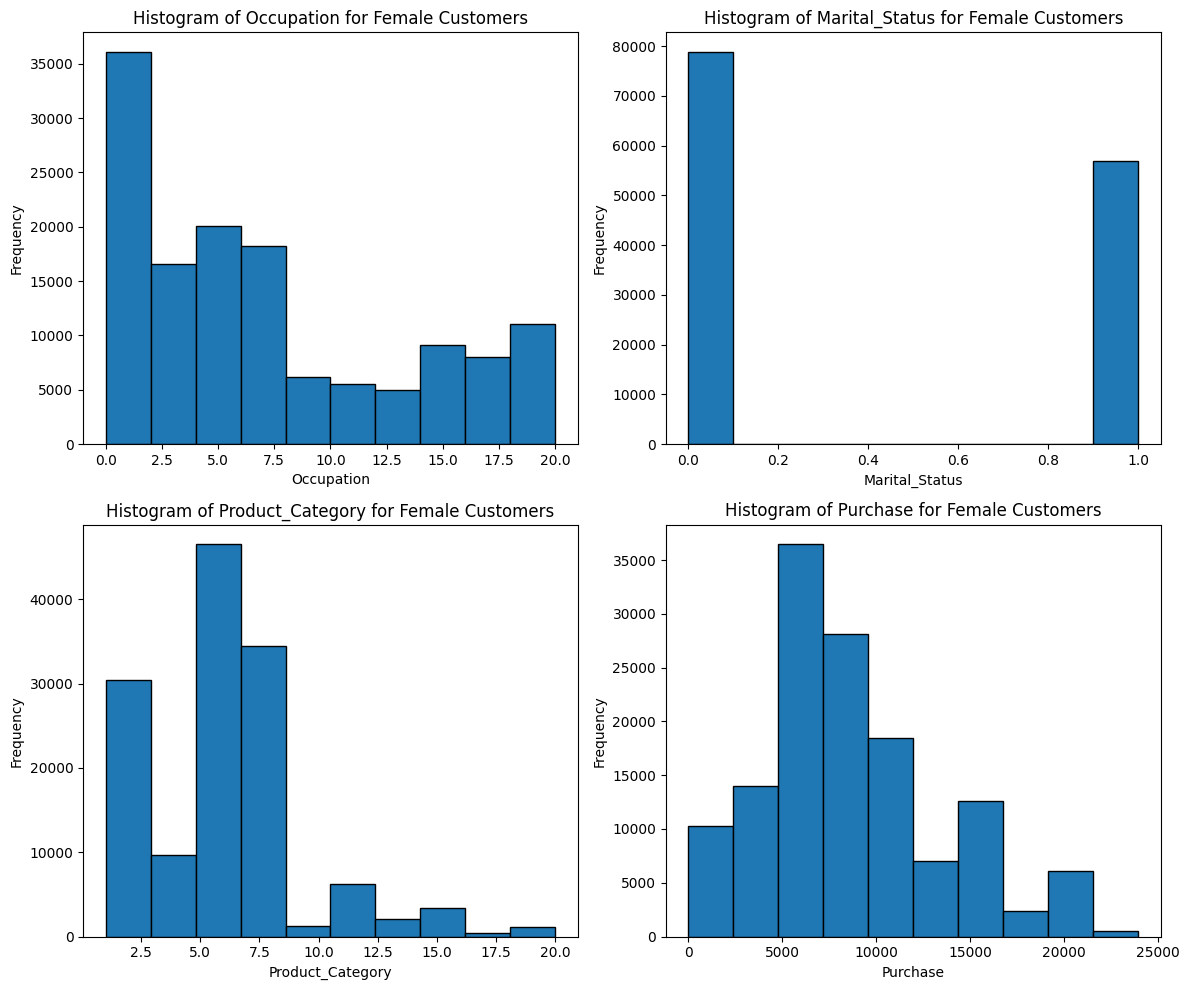

In [71]:
# histograms for all numerical data for female customers
numerical_columns = ["Occupation", "Marital_Status", "Product_Category", "Purchase"]
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df_female[column], bins=10, edgecolor="black")
    plt.title(f"Histogram of {column} for Female Customers")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

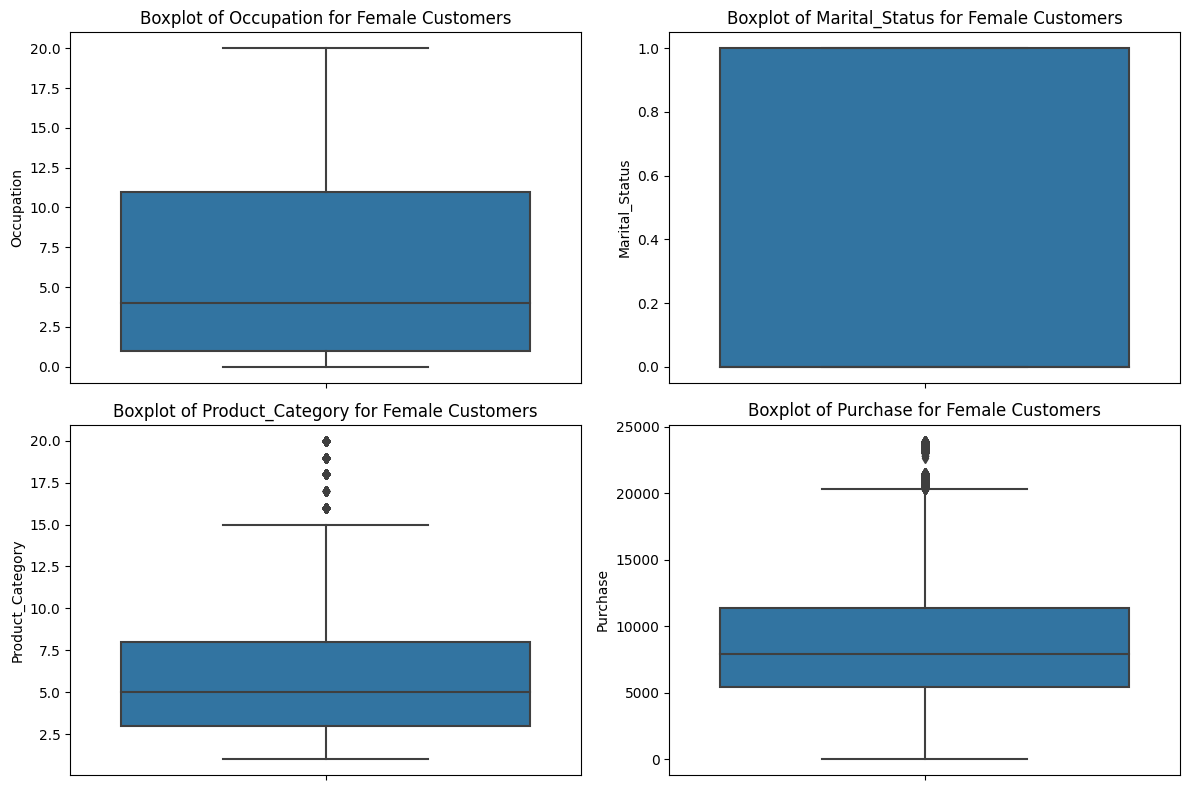

In [72]:
# boxplot for numerical data for female customers
numerical_columns = ["Occupation", "Marital_Status", "Product_Category", "Purchase"]
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_female, y=column)
    plt.title(f"Boxplot of {column} for Female Customers")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

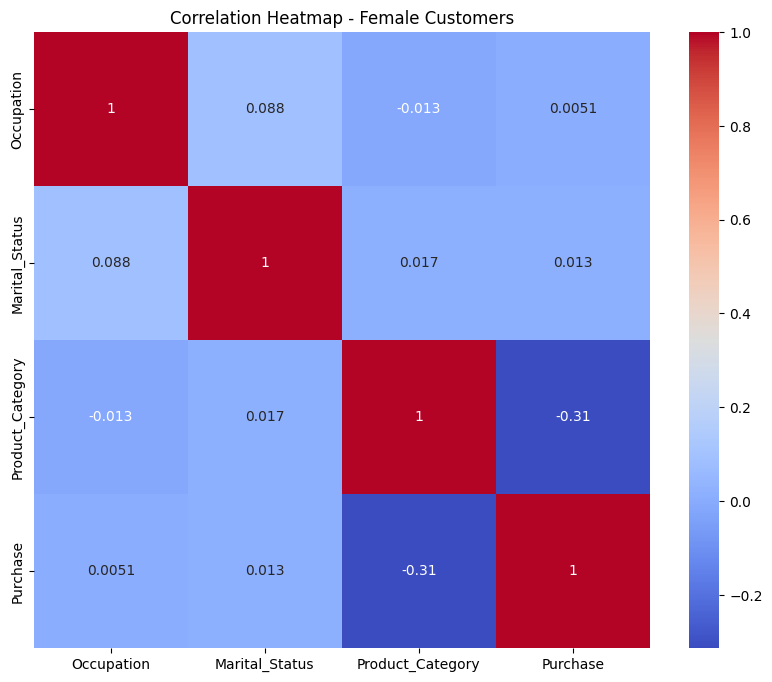

In [73]:
# heatmap for numerical data for female customers
numerical_columns = ["Occupation", "Marital_Status", "Product_Category", "Purchase"]
correlation_matrix = df_female[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - Female Customers")
plt.show()

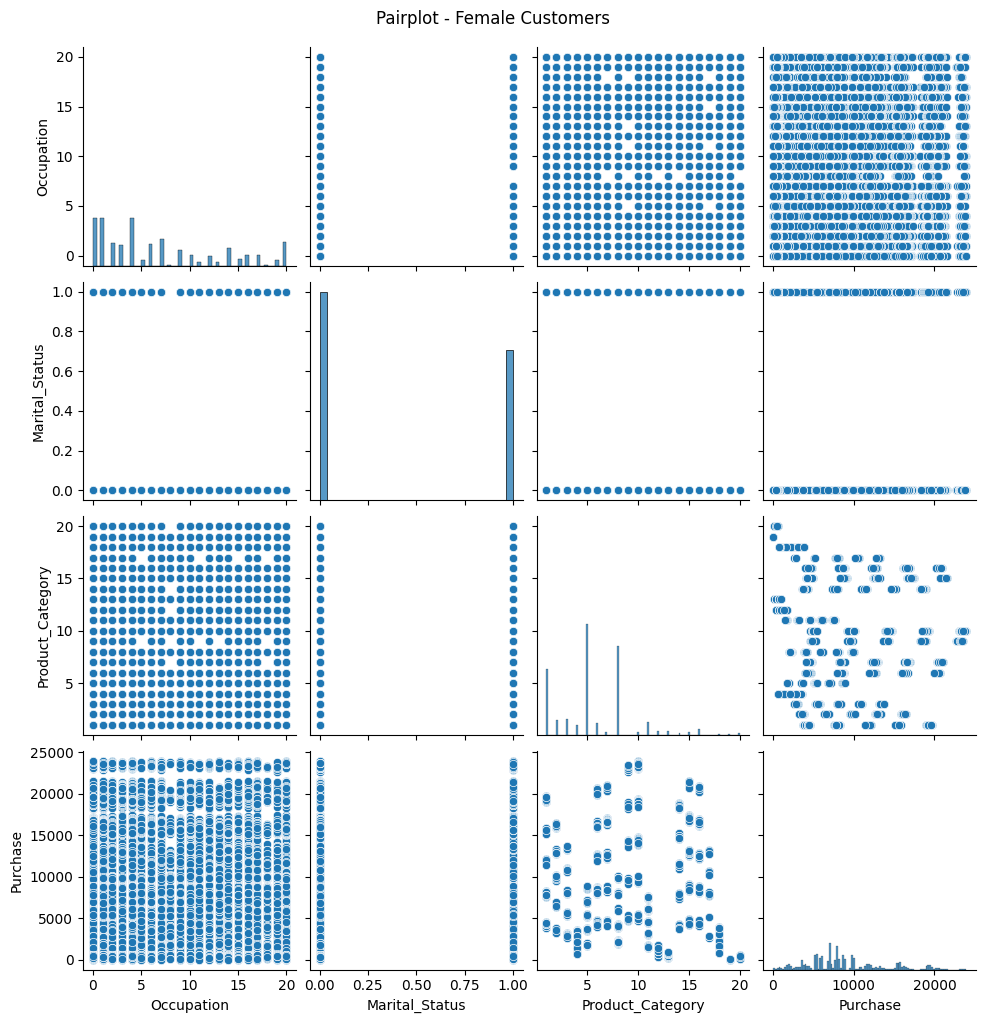

In [74]:
# pairplot for numerical data for female customers
numerical_columns = ["Occupation", "Marital_Status", "Product_Category", "Purchase"]
sns.pairplot(df_female[numerical_columns])
plt.suptitle("Pairplot - Female Customers", y = 1.02)
plt.show()

### Visual Analytics for Male Customers

/var/folders/7t/wnyn31qs37gg4xdxsbzlpmrh0000gn/T/ipykernel_89377/200128551.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_male[column], kde = False)


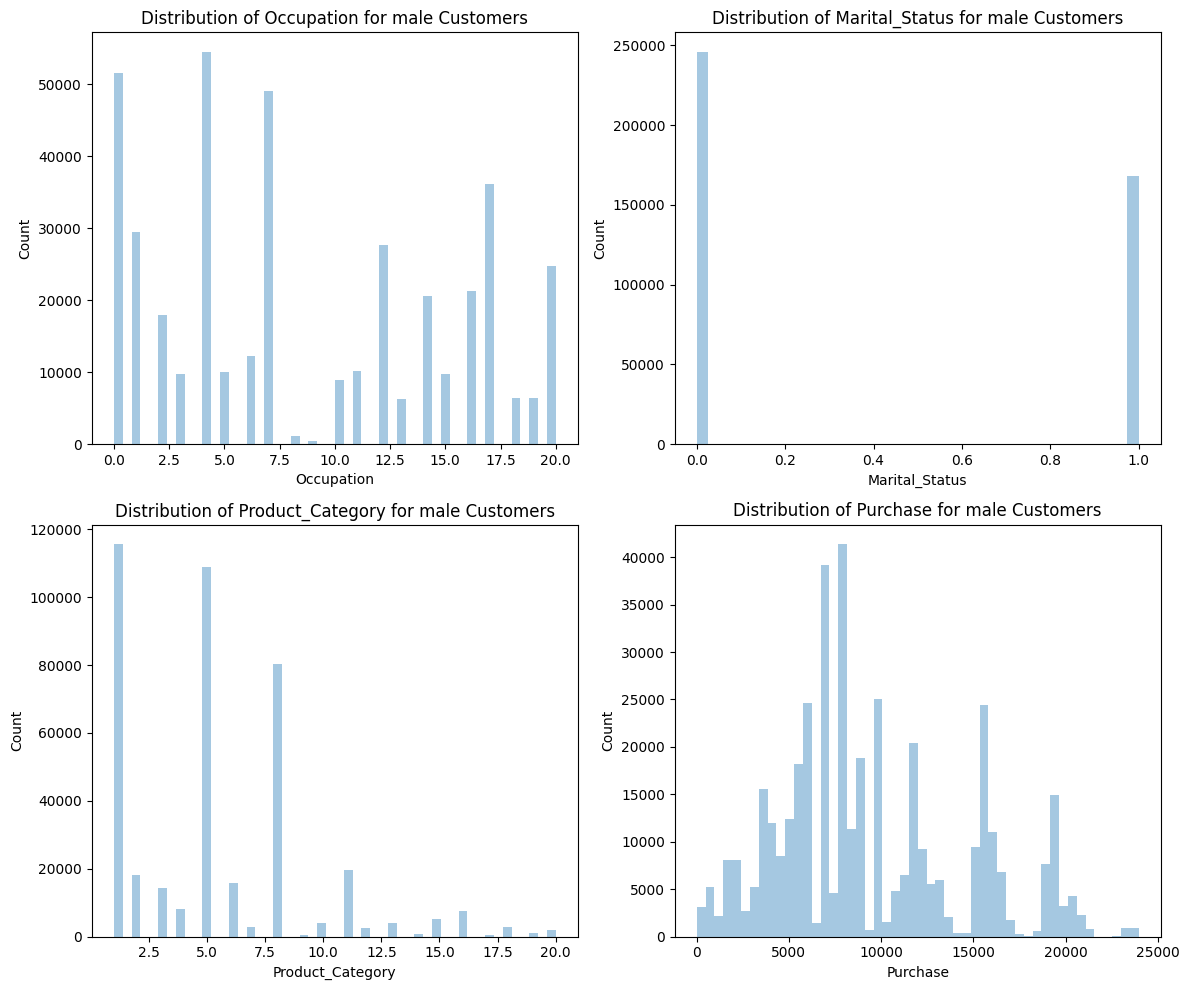

In [75]:
# distplot for numerical data for male customers
#df_male.info()
numerical_columns = ["Occupation", "Marital_Status", "Product_Category", "Purchase"]
plt.figure(figsize = (12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.distplot(df_male[column], kde = False)
    plt.title(f"Distribution of {column} for male Customers")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

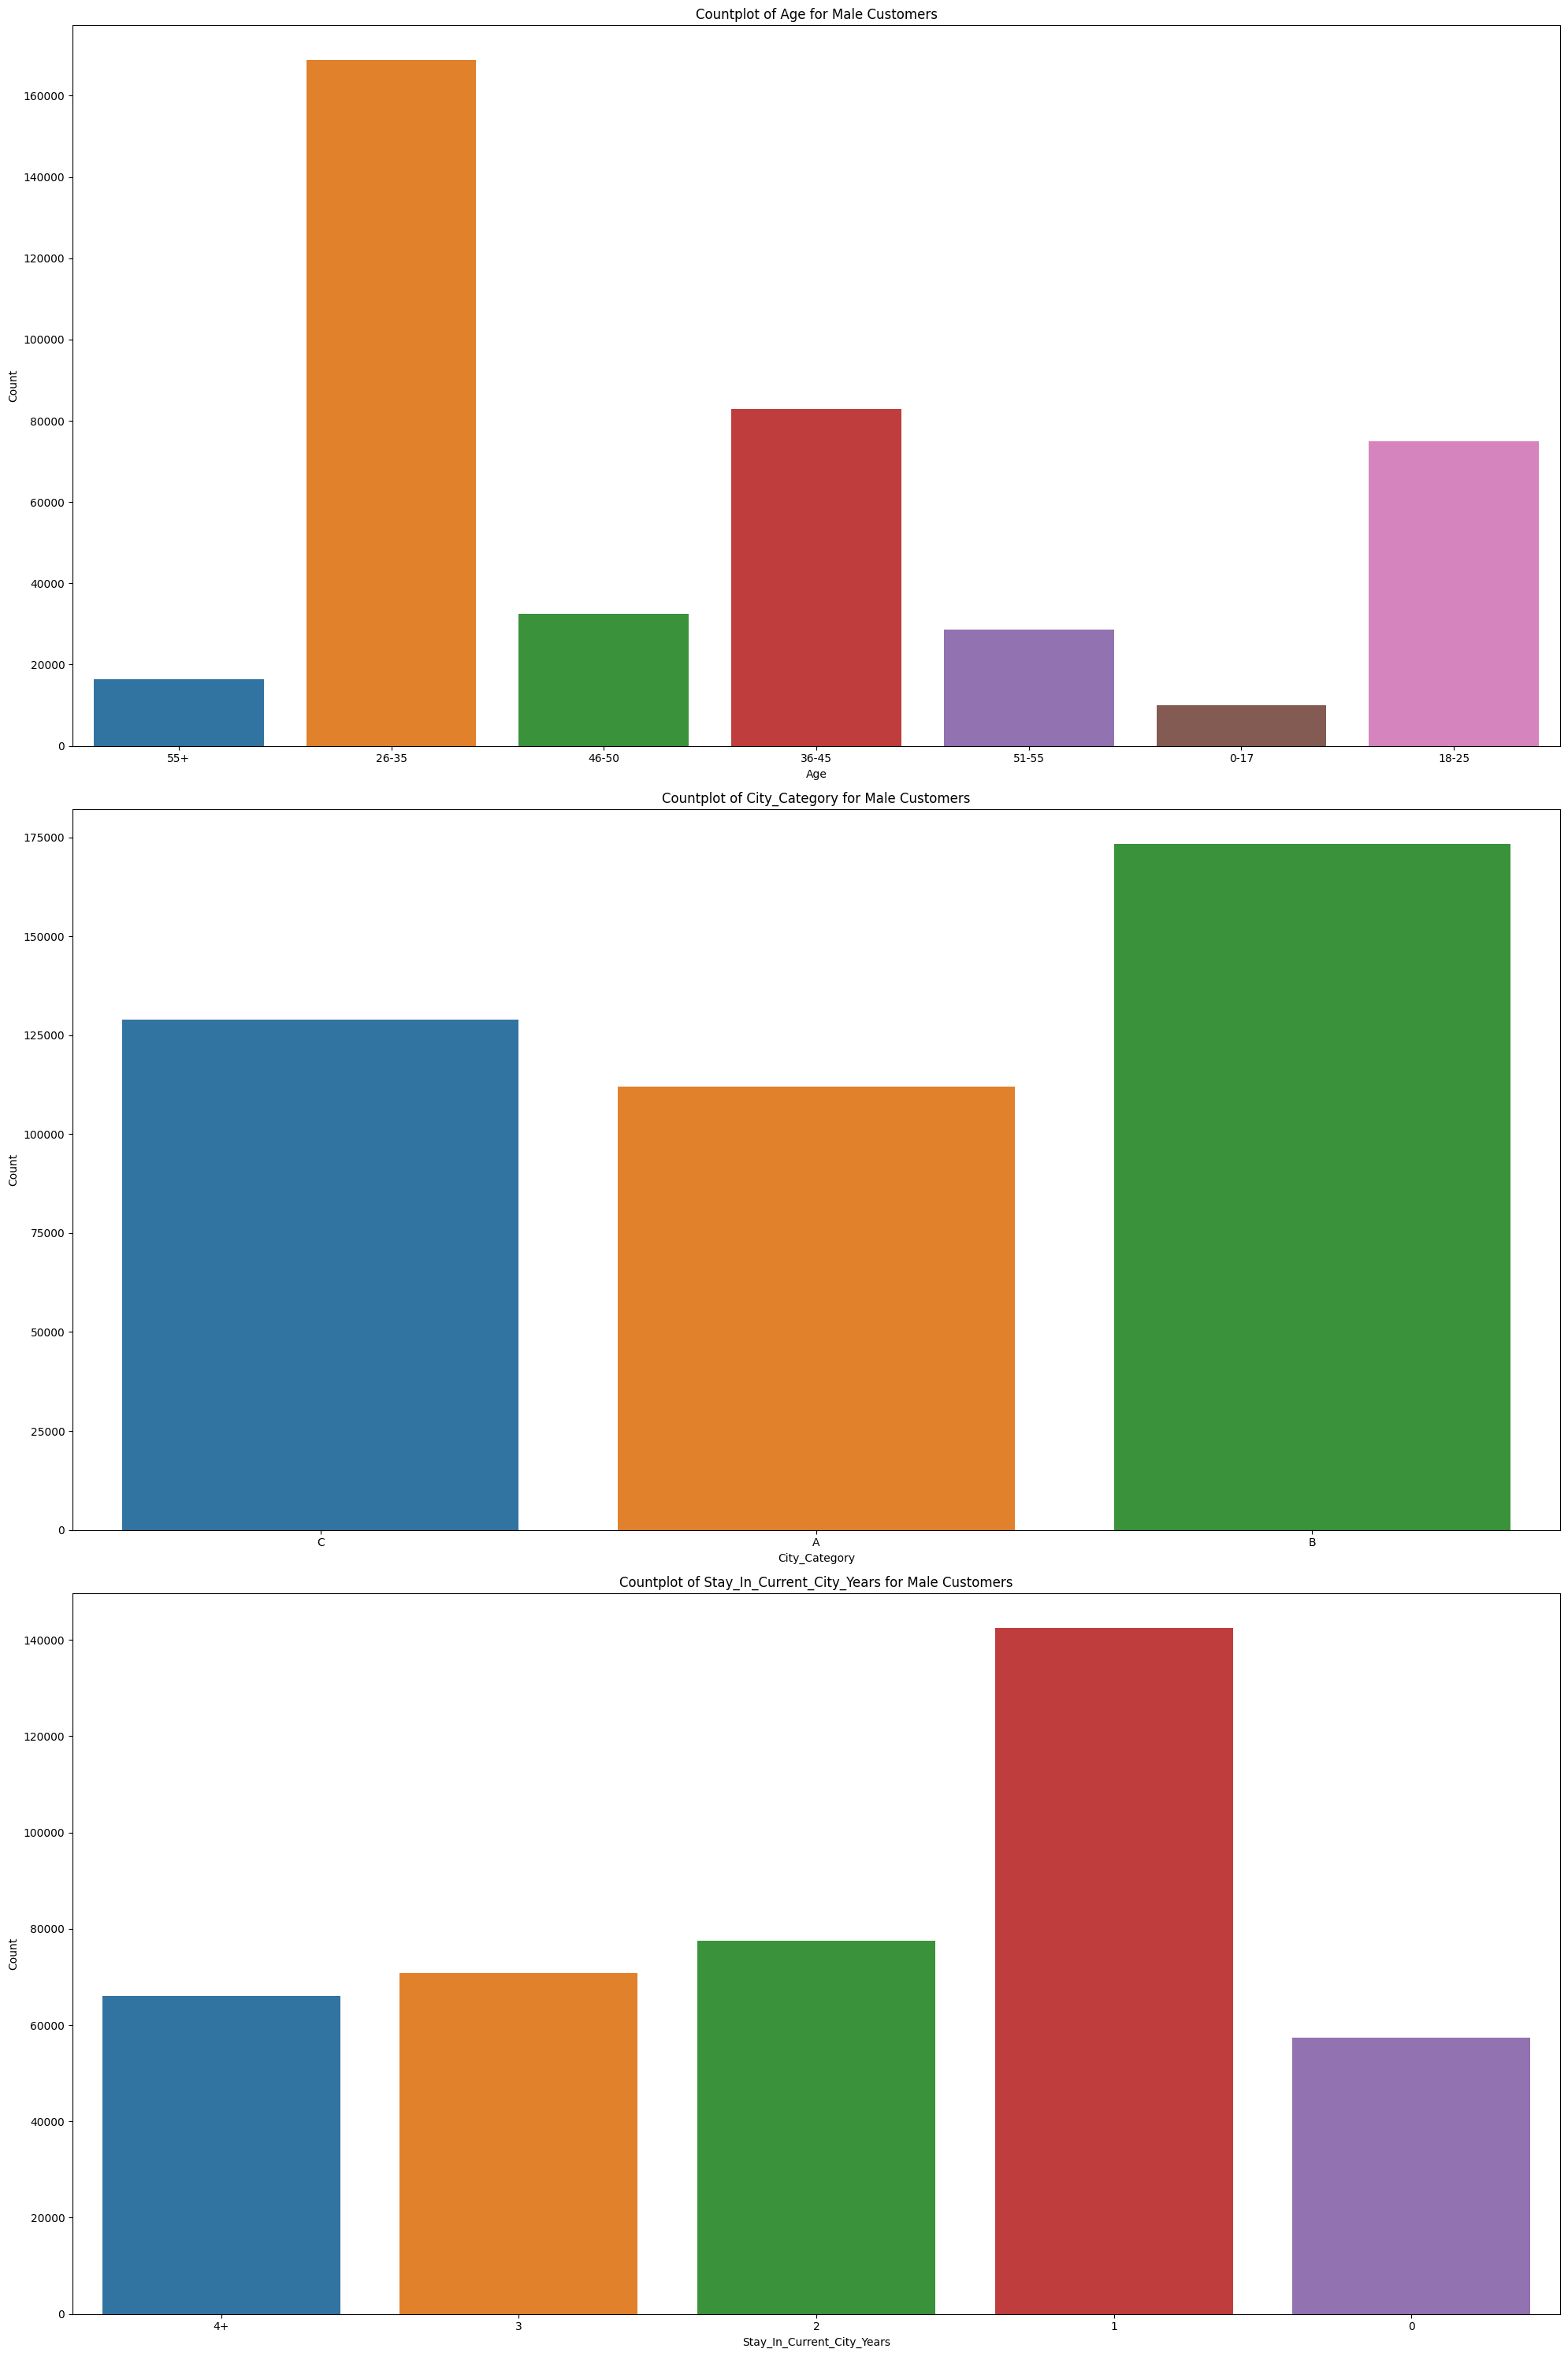

In [76]:
# countplot for categorical data for male customers
categorical_columns = ["Age", "City_Category", "Stay_In_Current_City_Years"]
plt.figure(figsize = (20, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(data = df_male, x = column)
    plt.title(f"Countplot of {column} for Male Customers")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

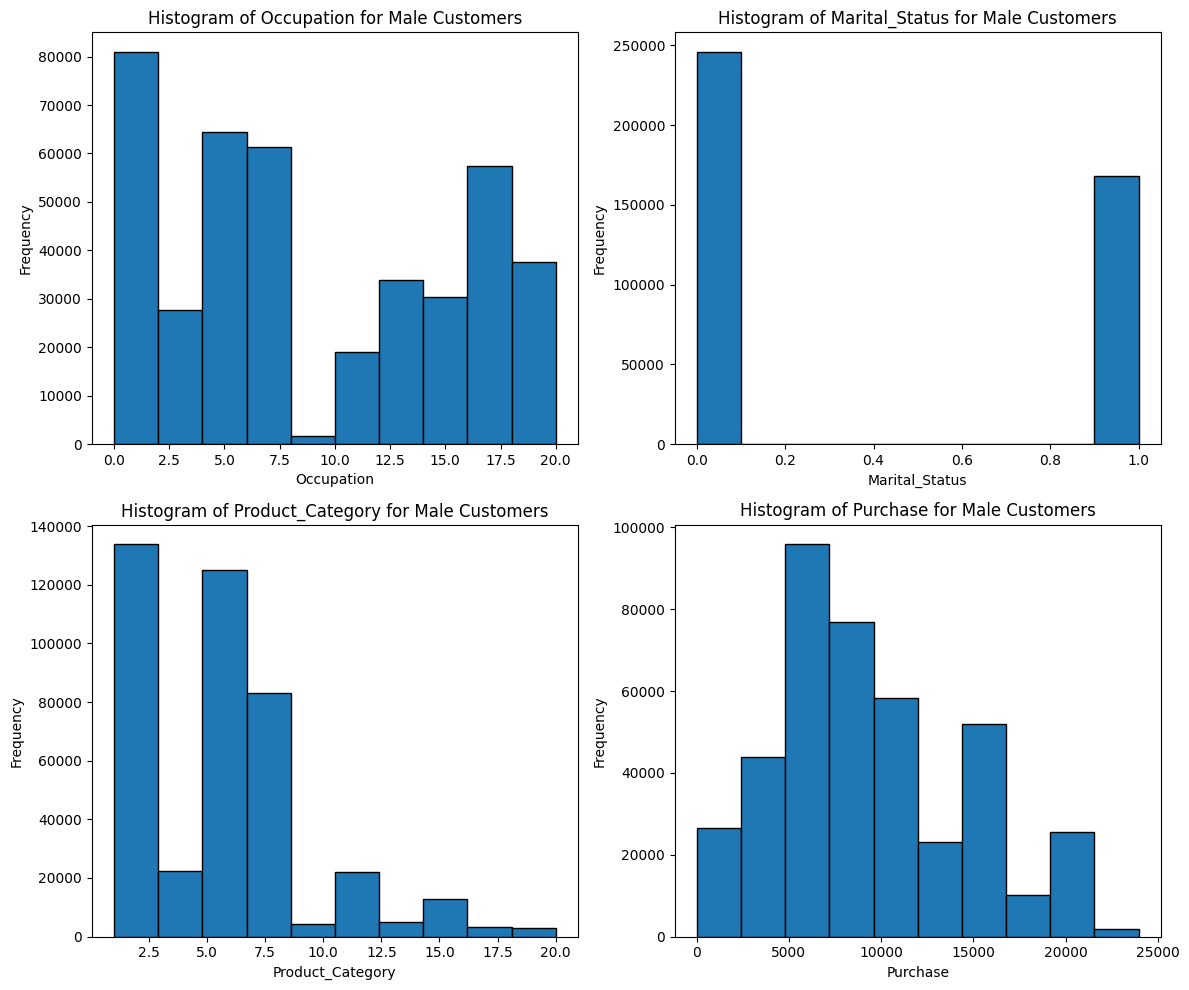

In [77]:
# histograms for all numerical data for male customers
numerical_columns = ["Occupation", "Marital_Status", "Product_Category", "Purchase"]
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df_male[column], bins=10, edgecolor="black")
    plt.title(f"Histogram of {column} for Male Customers")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

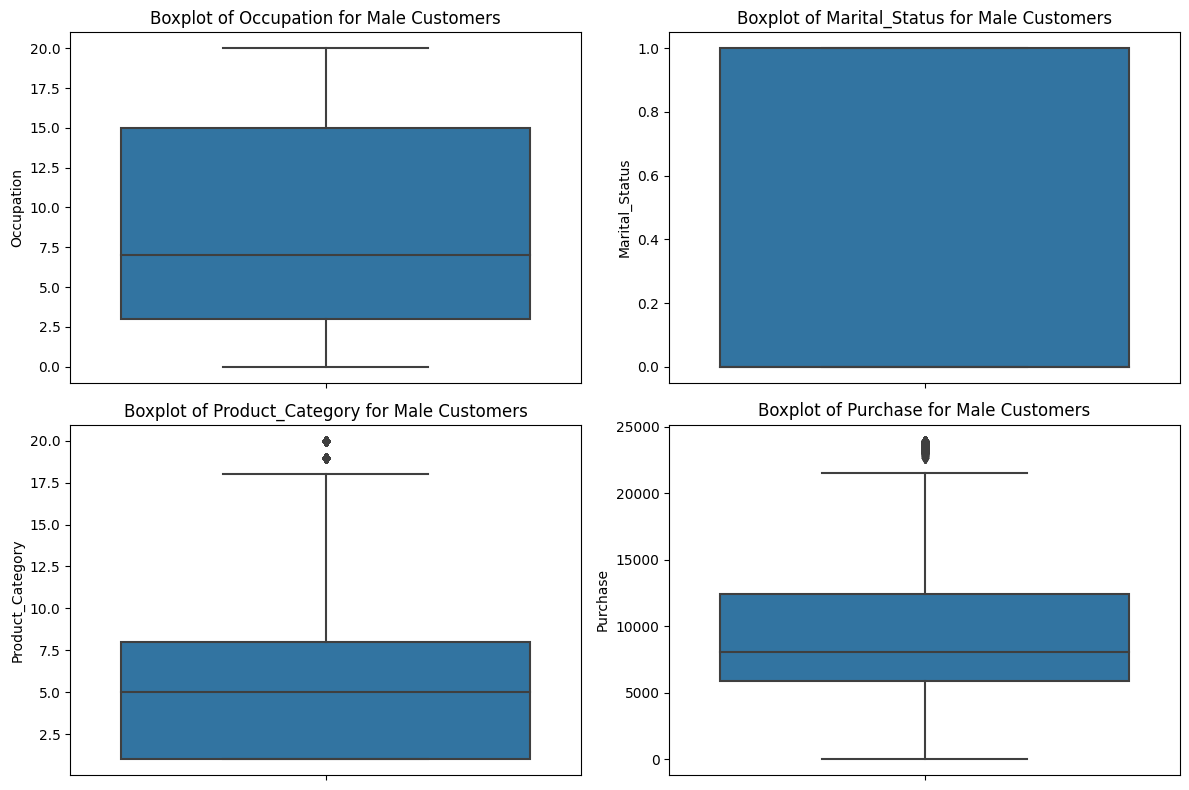

In [78]:
# boxplot for numerical data for male customers
numerical_columns = ["Occupation", "Marital_Status", "Product_Category", "Purchase"]
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_male, y=column)
    plt.title(f"Boxplot of {column} for Male Customers")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

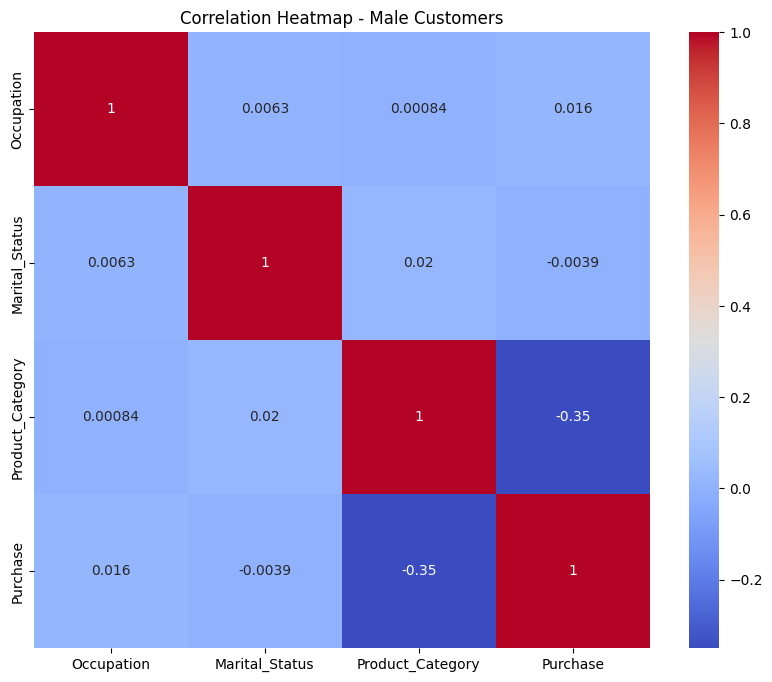

In [79]:
# heatmap for numerical data for male customers
numerical_columns = ["Occupation", "Marital_Status", "Product_Category", "Purchase"]
correlation_matrix = df_male[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - Male Customers")
plt.show()

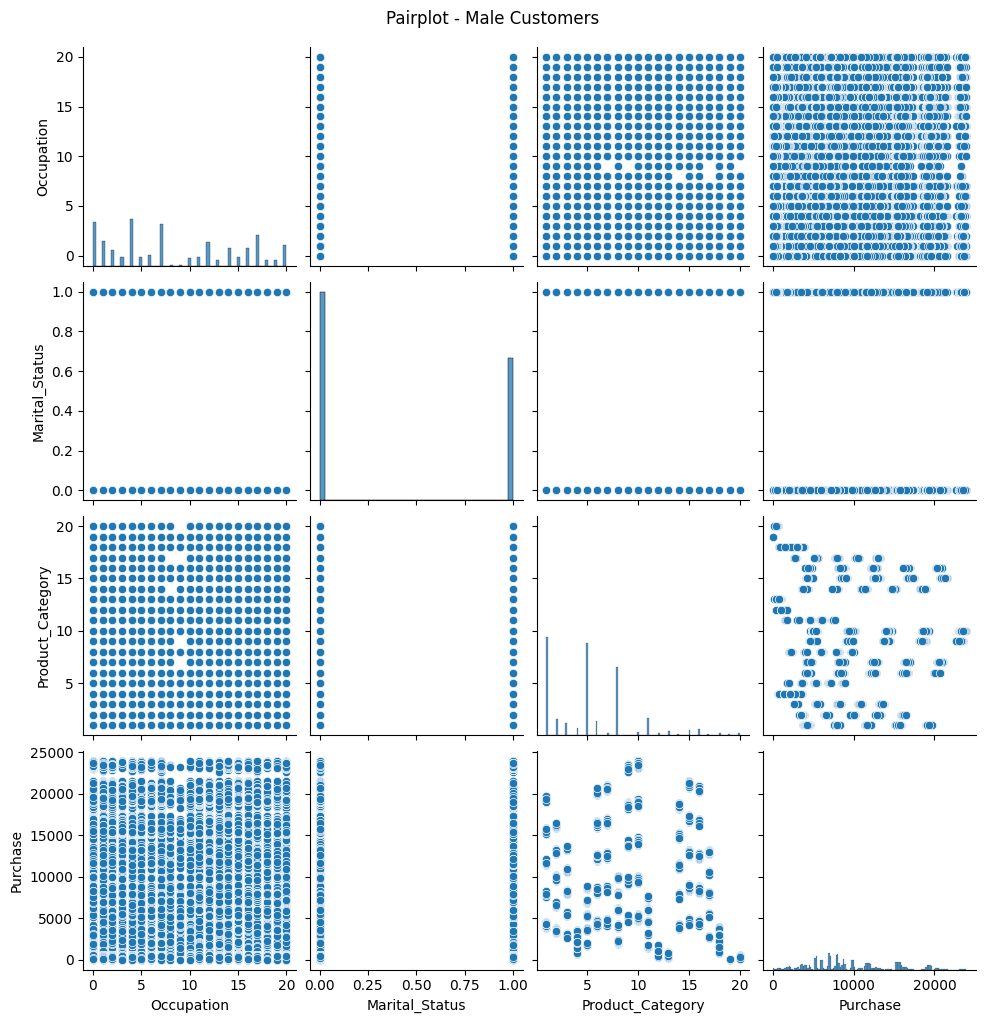

In [80]:
# pairplot for numerical data for male customers
numerical_columns = ["Occupation", "Marital_Status", "Product_Category", "Purchase"]
sns.pairplot(df_male[numerical_columns])
plt.suptitle("Pairplot - Male Customers", y = 1.02)
plt.show()

# 2. Missing Value & Outlier Detection

## Missing Values

In [81]:
missing_values = df.isna().sum()
print(f"Missing Values : \n\n{missing_values}")

Missing Values : 

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


## Outliers

In [82]:
outliers = {}
for column in df.columns:
    if df[column].dtype != object:
        mean = df[column].mean()
        std = df[column].std()
        column_outliers = df[(np.abs(df[column] - mean) > 3 * std)]
        outliers[column] = column_outliers
print("Outliers:")
for column, column_outliers in outliers.items():
    print(f"{column} Outliers:\n{column_outliers}\n")

Outliers:
User_ID Outliers:
Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category, Purchase]
Index: []

Occupation Outliers:
Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category, Purchase]
Index: []

Marital_Status Outliers:
Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category, Purchase]
Index: []

Product_Category Outliers:
        User_ID Product_ID Gender    Age  Occupation City_Category   
304     1000053  P00117542      M  26-35           0             B  \
796     1000148  P00119242      M  51-55          17             B   
1559    1000251  P00117542      M    55+          17             A   
1967    1000314  P00117542      F    55+           9             C   
2167    1000338  P00117542      M  36-4

# 3. Business Insights based on Non- Graphical and Visual Analysis

### Comments on the range of attributes

#### For Female Customers:
1. The total number of unique User IDs of Female Customers = 1666
2. The total number of unique Product IDs purchased by Female Customers = 3367
3. The total number of unique Age Groups that Female Customers belong to = 7
4. The total number of unique Occupations of Female Customers = 21
5. The total number of unique City Categories that the Female Customers live in = 3
6. The total number of unique years that Female Customers have stayed in a city for = 5
7. The total number of unique Marital Status of Female Customers = 2
8. The total number of unique product categories Female Customers purchased from = 20
9. The smallest amount spent on Purchase made by Female Customers = 12
10. The largest amount spent on Purchase made by Female Customers = 23959
11. The total amount spent on Purchases made by all the Female Customers = 1186232642
12. The average amount spent on Purchases made by Female Customers = 8734.565765155476 

#### For Male Customers:
1. The total number of unique User IDs of Male Customers = 4225
2. The total number of unique Product IDs purchased by Male Customers = 3588
3. The total number of unique Age Groups that Male Customers belong to = 7
4. The total number of unique Occupations of Male Customers = 21
5. The total number of unique City Categories that the Male Customers live in = 3
6. The total number of unique years that Male Customers have stayed in a city for = 5
7. The total number of unique Marital Status of Male Customers = 2
8. The total number of unique product categories that Male Customers purchased from = 20
9. The smallest amount spent on Purchase made by Male Customers = 12
10. The largest amount spent on Purchase made by Male Customers = 23961
11. The total amount spent on Purchases made by all the Male Customers = 3909580100
12. The average amount spent on Purchases made by Male Customers = 9437.526040472265

### Comments on the distribution of the variables and relationship between them

1. The average amount spent on Purchases is higher is Male Customers compared to Female Customers.
2. The age group of 51 - 55 has the highest of mean amount spent on Purchases compared to other age groups.
3. The customers with occupation 17 have the highest mean amount spent on Purchases.
4. The customers living in City with "C" as category have the highest mean amount spent on purchases.
5. The customers who have stayed is a particular city for 2 years have the highest mean amount spent on purchases.
6. The customers whose marital status is 0 have a greater mean amount spent on purchases.

### Comments for each univariate and bivariate plot

#### For Female Customers
1. Most number of Female customers have their occupation 0.
2. Most number of Female customers have their marital status as 0.
3. Most number of Female customers have purchased products from product category 5.
4. Highest amount of purchases made by the Female customers are in the range from 5000 to 10000 purchase amount.
5. Most number of Female customers are from the age group 26 to 35.
6. Most number of Female customers are from city category "B".
7. Most number of Female customers have stayed in city for 2 years.

#### For Male Customers:
1. Most number of Male customers have their occupation 4.
2. Most number of Male customers have their marital status as 0.
3. Most number of Male customers have purchased products from product category 0.
4. Highest amount of purchases made by the Male customers are in the range from 5000 to 10000 purchase amount.
5. Most number of Male customers are from the age group 26 to 35.
6. Most number of Male customers are from city category "B".
7. Most number of Male customers have stayed in city for 1 years.

# 4. Answering questions

## 4.1 Are women spending more money per transaction than men? Why or Why not? (For a sample size of 10 million: 5 million Female and 5 million Male Customers)

10047.633333333333


<Axes: ylabel='Count'>

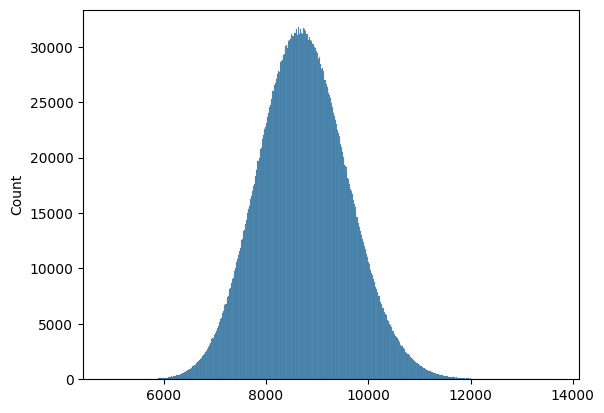

In [83]:
# Bootstrap the dataset for female purchases to generate a sample of 5 million
n = 5000000
female_bootstrap_sample = np.random.choice(df_female["Purchase"], size=30)
print(np.mean(female_bootstrap_sample))

female_bootstrap_samples = []
for reps in range(n):
    female_bootstrap_replicate = np.random.choice(df_female["Purchase"], size=30)
    female_bootstrap_mean = np.mean(female_bootstrap_replicate)
    female_bootstrap_samples.append(female_bootstrap_mean)
    

sns.histplot(female_bootstrap_samples)

9579.266666666666


<Axes: ylabel='Count'>

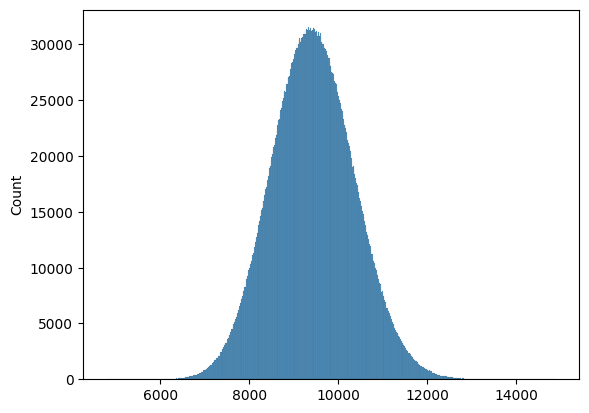

In [84]:
# Bootstrap the dataset for male purchases to generate a sample of 5 million
n = 5000000
male_bootstrap_sample = np.random.choice(df_male["Purchase"], size=30)
print(np.mean(male_bootstrap_sample))

male_bootstrap_samples = []
for reps in range(n):
    male_bootstrap_replicate = np.random.choice(df_male["Purchase"], size=30)
    male_bootstrap_mean = np.mean(male_bootstrap_replicate)
    male_bootstrap_samples.append(male_bootstrap_mean)
    

sns.histplot(male_bootstrap_samples)

## 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers

### Confidence Interval

In [85]:
female_expenses = pd.DataFrame(female_bootstrap_samples)
male_expenses = pd.DataFrame(male_bootstrap_samples)

female_expenses_mean = female_expenses.mean()
male_expenses_mean = male_expenses.mean()
female_expenses_std = female_expenses.std()
male_expenses_std = male_expenses.std()

female_expenses_se = female_expenses_std/ np.sqrt(len(female_expenses))
male_expenses_se = male_expenses_std/ np.sqrt(len(male_expenses))

set_ci = 0.95

z_critical = norm.ppf((1 + set_ci)/ 2)

female_error_margin = z_critical * female_expenses_se
male_error_margin = z_critical * male_expenses_se

female_lower_bound = female_expenses_mean - female_error_margin
female_upper_bound = female_expenses_mean + female_error_margin
male_lower_bound = male_expenses_mean - male_error_margin
male_upper_bound = male_expenses_mean + male_error_margin


print(f"Confidence Interval for Mean Expenses (Female): {female_lower_bound}, {female_upper_bound}]")
print(f"Confidence Interval for Mean Expenses (Male): {male_lower_bound}, {male_upper_bound}]")

Confidence Interval for Mean Expenses (Female): 0    8733.282861
dtype: float64, 0    8734.808852
dtype: float64]
Confidence Interval for Mean Expenses (Male): 0    9437.409394
dtype: float64, 0    9439.040103
dtype: float64]


### Distribution of Mean

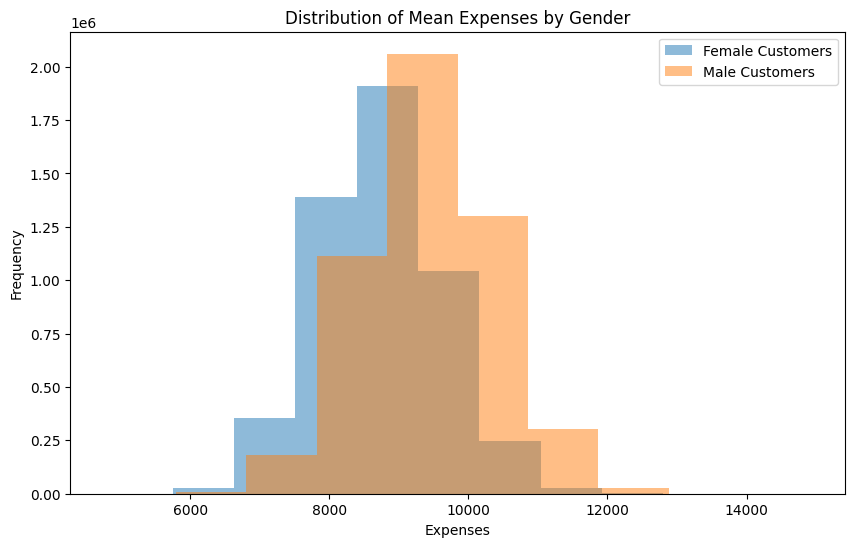

In [86]:
plt.figure(figsize=(10, 6))
plt.hist(female_expenses, bins=10, alpha=0.5, label='Female Customers')
plt.hist(male_expenses, bins=10, alpha=0.5, label='Male Customers')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Expenses by Gender')
plt.legend()
plt.show()

## 4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [87]:
if (female_upper_bound < male_lower_bound).all() or (male_upper_bound < female_lower_bound).all():
    print("The confidence intervals of average male and female spending do not overlap.")
else:
    print("The confidence intervals of average male and female spending overlap.")

The confidence intervals of average male and female spending do not overlap.


Walmart can leverage this conclusion to make changes or improvements by considering the following:
1. Targeted Marketing: If the confidence intervals overlap, it suggests that there might not be a significant difference in spending between genders. Walmart can focus on gender-neutral marketing strategies and promotions to cater to a broader audience.
2. Customer Segmentation: If the confidence intervals do not overlap, indicating a significant difference in spending between genders, Walmart can analyze the preferences and buying patterns of each group separately. This information can be used to tailor product offerings and marketing campaigns specifically to each gender.
3. Pricing Strategies: If there is a significant difference in spending between genders, Walmart can adjust its pricing strategies accordingly. For example, if females are spending more, Walmart can consider offering more exclusive deals and discounts targeted towards female customers.
4. Product Assortment: Analyzing the spending patterns of each gender can help Walmart understand which products are more popular among females and males. This knowledge can guide decisions on product assortment, ensuring that the right products are available to attract and cater to the preferences of each gender.
5. Customer Experience: Walmart can also focus on enhancing the overall shopping experience for both genders. This can include improving store layout, product placement, customer service, and providing personalized recommendations based on gender-specific preferences.

## 4.4 Results when the same activity is performed for Married vs Unmarried

In [88]:
df_marital_status_purchases = df[["Marital_Status", "Purchase"]]
df_marital_status_purchases

,Marital_Status,Purchase
0,0,8370
1,0,15200
2,0,1422
3,0,1057
4,0,7969
...,...,...
550063,1,368
550064,0,371
550065,1,137
550066,0,365


In [89]:
df_married = df[df["Marital_Status"] == 1]
df_unmarried = df[df["Marital_Status"] == 0]
df_married.reset_index(drop = True, inplace = True)
df_unmarried.reset_index(drop = True, inplace = True)

9483.033333333333


<Axes: ylabel='Count'>

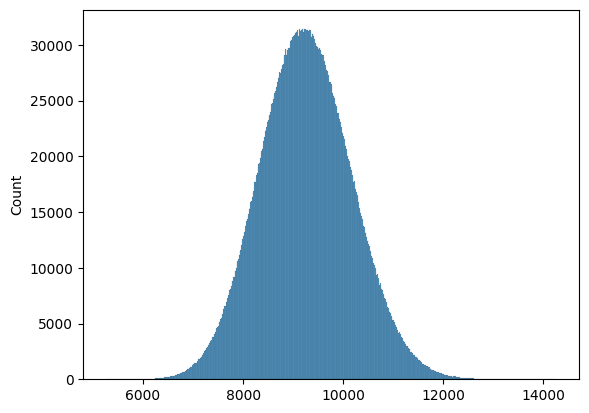

In [90]:
# Bootstrap the dataset for married customer purchases to generate a sample of 5 million
n = 5000000
married_bootstrap_sample = np.random.choice(df_married["Purchase"], size=30)
print(np.mean(married_bootstrap_sample))

married_bootstrap_samples = []
for reps in range(n):
    married_bootstrap_replicate = np.random.choice(df_married["Purchase"], size=30)
    married_bootstrap_mean = np.mean(married_bootstrap_replicate)
    married_bootstrap_samples.append(married_bootstrap_mean)
    

sns.histplot(married_bootstrap_samples)

8789.1


<Axes: ylabel='Count'>

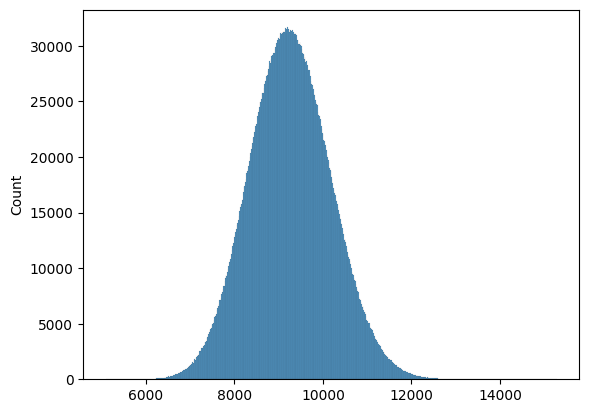

In [91]:
# Bootstrap the dataset for unmarried customer purchases to generate a sample of 5 million
n = 5000000
unmarried_bootstrap_sample = np.random.choice(df_unmarried["Purchase"], size=30)
print(np.mean(unmarried_bootstrap_sample))

unmarried_bootstrap_samples = []
for reps in range(n):
    unmarried_bootstrap_replicate = np.random.choice(df_unmarried["Purchase"], size=30)
    unmarried_bootstrap_mean = np.mean(unmarried_bootstrap_replicate)
    unmarried_bootstrap_samples.append(unmarried_bootstrap_mean)
    

sns.histplot(unmarried_bootstrap_samples)

In [92]:
# calculating the confidence interval of married and unmarried customers
married_expenses = pd.DataFrame(married_bootstrap_samples)
unmarried_expenses = pd.DataFrame(unmarried_bootstrap_samples)

married_expenses_mean = married_expenses.mean()
unmarried_expenses_mean = unmarried_expenses.mean()
married_expenses_std = married_expenses.std()
unmarried_expenses_std = unmarried_expenses.std()

married_expenses_se = married_expenses_std/ np.sqrt(len(married_expenses))
unmarried_expenses_se = unmarried_expenses_std/ np.sqrt(len(unmarried_expenses))

set_ci = 0.95

z_critical = norm.ppf((1 + set_ci)/ 2)

married_error_margin = z_critical * married_expenses_se
unmarried_error_margin = z_critical * unmarried_expenses_se

married_lower_bound = married_expenses_mean - married_error_margin
married_upper_bound = married_expenses_mean + married_error_margin
unmarried_lower_bound = unmarried_expenses_mean - unmarried_error_margin
unmarried_upper_bound = unmarried_expenses_mean + unmarried_error_margin


print(f"Confidence Interval for Mean Expenses (married): {married_lower_bound}, {married_upper_bound}]")
print(f"Confidence Interval for Mean Expenses (unmarried): {unmarried_lower_bound}, {unmarried_upper_bound}]")

Confidence Interval for Mean Expenses (married): 0    9259.904221
dtype: float64, 0    9261.510196
dtype: float64]
Confidence Interval for Mean Expenses (unmarried): 0    9264.920811
dtype: float64, 0    9266.529606
dtype: float64]


In [93]:
if (married_upper_bound < unmarried_lower_bound).all() or (unmarried_upper_bound < married_lower_bound).all():
    print("The confidence intervals of average male and female spending do not overlap.")
else:
    print("The confidence intervals of average male and female spending overlap.")

The confidence intervals of average male and female spending do not overlap.


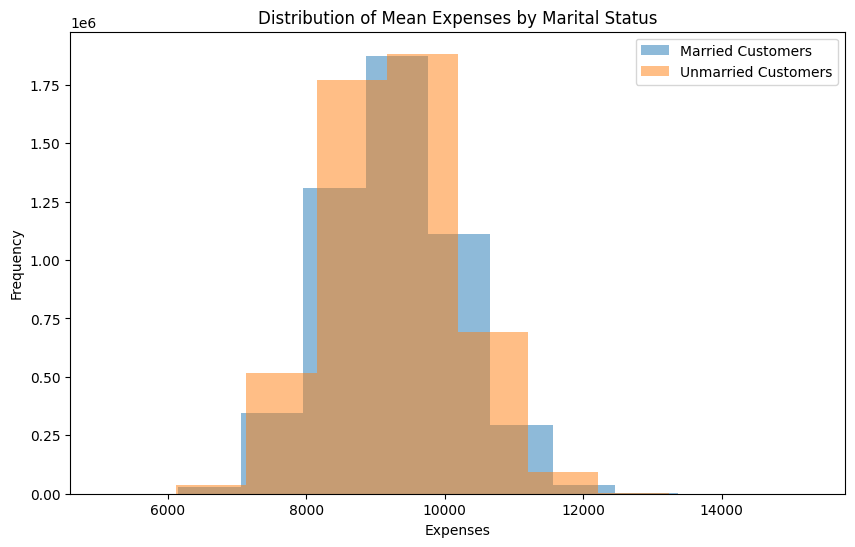

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(married_expenses, bins=10, alpha=0.5, label='Married Customers')
plt.hist(unmarried_expenses, bins=10, alpha=0.5, label='Unmarried Customers')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Expenses by Marital Status')
plt.legend()
plt.show()

## 4.5 Results when the same activity is performed for Age

In [95]:
df_age_purchases = df[["Age", "Purchase"]]
df_age_purchases

,Age,Purchase
0,0-17,8370
1,0-17,15200
2,0-17,1422
3,0-17,1057
4,55+,7969
...,...,...
550063,51-55,368
550064,26-35,371
550065,26-35,137
550066,55+,365


In [96]:
df_0_17_purchases = df[df["Age"] == "0-17"]
df_0_17_purchases.reset_index(drop = True, inplace = True)
df_18_25_purchases = df[df["Age"] == "18-25"]
df_18_25_purchases.reset_index(drop = True, inplace = True)
df_26_35_purchases = df[df["Age"] == "26-35"]
df_26_35_purchases.reset_index(drop = True, inplace = True)
df_36_45_purchases = df[df["Age"] == "36-45"]
df_36_45_purchases.reset_index(drop = True, inplace = True)
df_46_50_purchases = df[df["Age"] == "46-50"]
df_46_50_purchases.reset_index(drop = True, inplace = True)
df_51_55_purchases = df[df["Age"] == "51-55"]
df_51_55_purchases.reset_index(drop = True, inplace = True)
df_55plus_purchases = df[df["Age"] == "55+"]
df_55plus_purchases.reset_index(drop = True, inplace = True)

10321.066666666668


<Axes: ylabel='Count'>

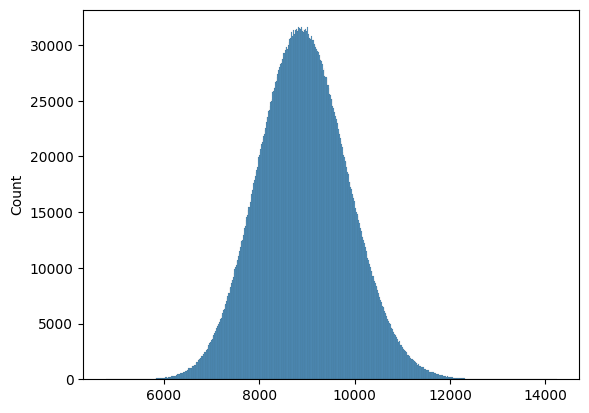

In [97]:
# Bootstrap the dataset for 0 to 17 customer purchases to generate a sample of 5 million
n = 5000000
_0_17_bootstrap_sample = np.random.choice(df_0_17_purchases["Purchase"], size=30)
print(np.mean(_0_17_bootstrap_sample))

_0_17_bootstrap_samples = []
for reps in range(n):
    _0_17_bootstrap_replicate = np.random.choice(df_0_17_purchases["Purchase"], size=30)
    _0_17_bootstrap_mean = np.mean(_0_17_bootstrap_replicate)
    _0_17_bootstrap_samples.append(_0_17_bootstrap_mean)
    
sns.histplot(_0_17_bootstrap_samples)

9862.8


<Axes: ylabel='Count'>

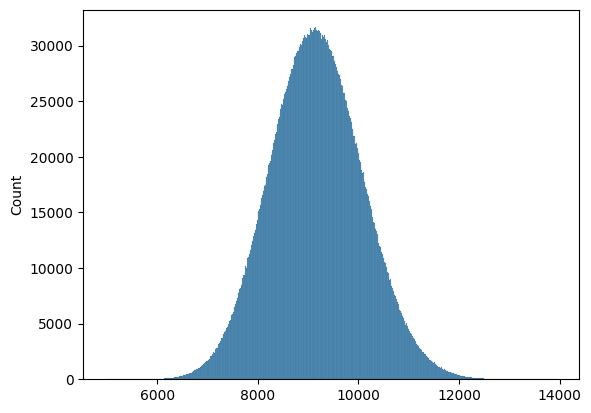

In [98]:
# Bootstrap the dataset for 18 to 25 customer purchases to generate a sample of 5 million
n = 5000000
_18_25_bootstrap_sample = np.random.choice(df_18_25_purchases["Purchase"], size=30)
print(np.mean(_18_25_bootstrap_sample))

_18_25_bootstrap_samples = []
for reps in range(n):
    _18_25_bootstrap_replicate = np.random.choice(df_18_25_purchases["Purchase"], size=30)
    _18_25_bootstrap_mean = np.mean(_18_25_bootstrap_replicate)
    _18_25_bootstrap_samples.append(_18_25_bootstrap_mean)
    
sns.histplot(_18_25_bootstrap_samples)

10505.633333333333


<Axes: ylabel='Count'>

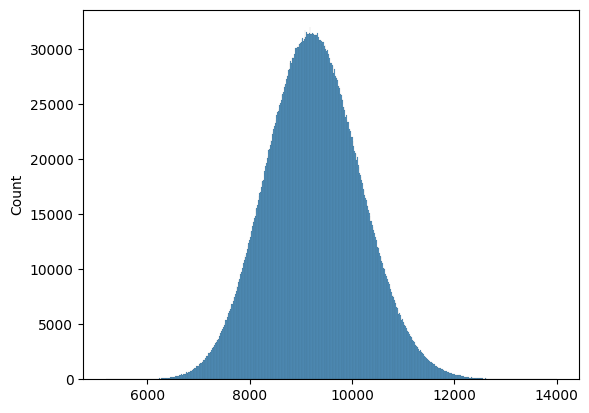

In [99]:
# Bootstrap the dataset for 26 to 35 customer purchases to generate a sample of 5 million
n = 5000000
_26_35_bootstrap_sample = np.random.choice(df_26_35_purchases["Purchase"], size=30)
print(np.mean(_26_35_bootstrap_sample))

_26_35_bootstrap_samples = []
for reps in range(n):
    _26_35_bootstrap_replicate = np.random.choice(df_26_35_purchases["Purchase"], size=30)
    _26_35_bootstrap_mean = np.mean(_26_35_bootstrap_replicate)
    _26_35_bootstrap_samples.append(_26_35_bootstrap_mean)
    
sns.histplot(_26_35_bootstrap_samples)

9318.5


<Axes: ylabel='Count'>

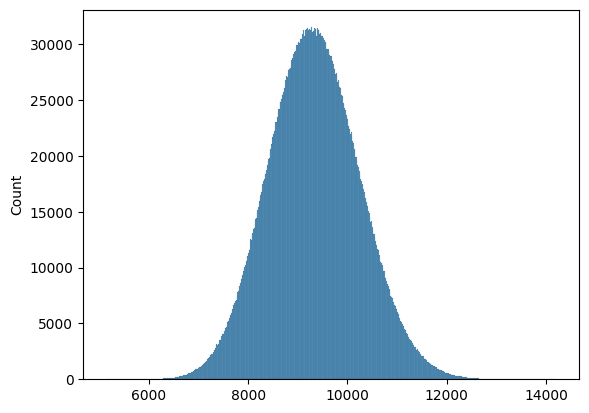

In [100]:
# Bootstrap the dataset for 36 to 45 customer purchases to generate a sample of 5 million
n = 5000000
_36_45_bootstrap_sample = np.random.choice(df_36_45_purchases["Purchase"], size=30)
print(np.mean(_36_45_bootstrap_sample))

_36_45_bootstrap_samples = []
for reps in range(n):
    _36_45_bootstrap_replicate = np.random.choice(df_36_45_purchases["Purchase"], size=30)
    _36_45_bootstrap_mean = np.mean(_36_45_bootstrap_replicate)
    _36_45_bootstrap_samples.append(_36_45_bootstrap_mean)
    
sns.histplot(_36_45_bootstrap_samples)

7985.4


<Axes: ylabel='Count'>

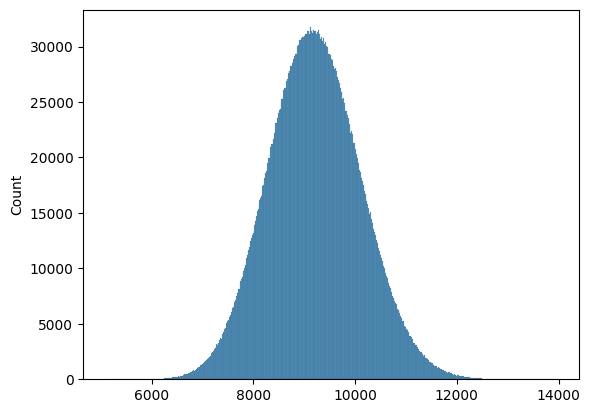

In [101]:
# Bootstrap the dataset for 46 to 50 customer purchases to generate a sample of 5 million
n = 5000000
_46_50_bootstrap_sample = np.random.choice(df_46_50_purchases["Purchase"], size=30)
print(np.mean(_46_50_bootstrap_sample))

_46_50_bootstrap_samples = []
for reps in range(n):
    _46_50_bootstrap_replicate = np.random.choice(df_46_50_purchases["Purchase"], size=30)
    _46_50_bootstrap_mean = np.mean(_46_50_bootstrap_replicate)
    _46_50_bootstrap_samples.append(_46_50_bootstrap_mean)
    
sns.histplot(_46_50_bootstrap_samples)

7368.2


<Axes: ylabel='Count'>

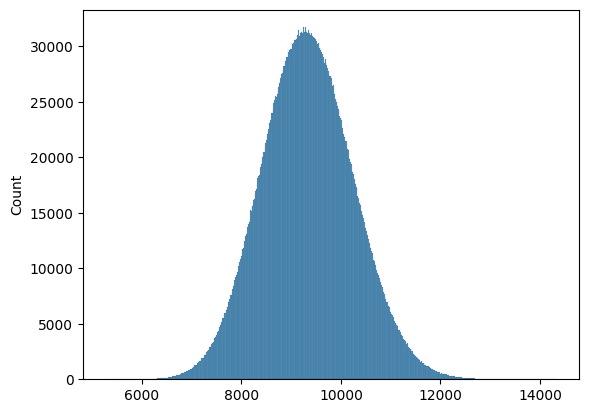

In [102]:
# Bootstrap the dataset for 55+ customer purchases to generate a sample of 5 million
n = 5000000
_55plus_bootstrap_sample = np.random.choice(df_55plus_purchases["Purchase"], size=30)
print(np.mean(_55plus_bootstrap_sample))

_55plus_bootstrap_samples = []
for reps in range(n):
    _55plus_bootstrap_replicate = np.random.choice(df_55plus_purchases["Purchase"], size=30)
    _55plus_bootstrap_mean = np.mean(_55plus_bootstrap_replicate)
    _55plus_bootstrap_samples.append(_55plus_bootstrap_mean)
    
sns.histplot(_55plus_bootstrap_samples)

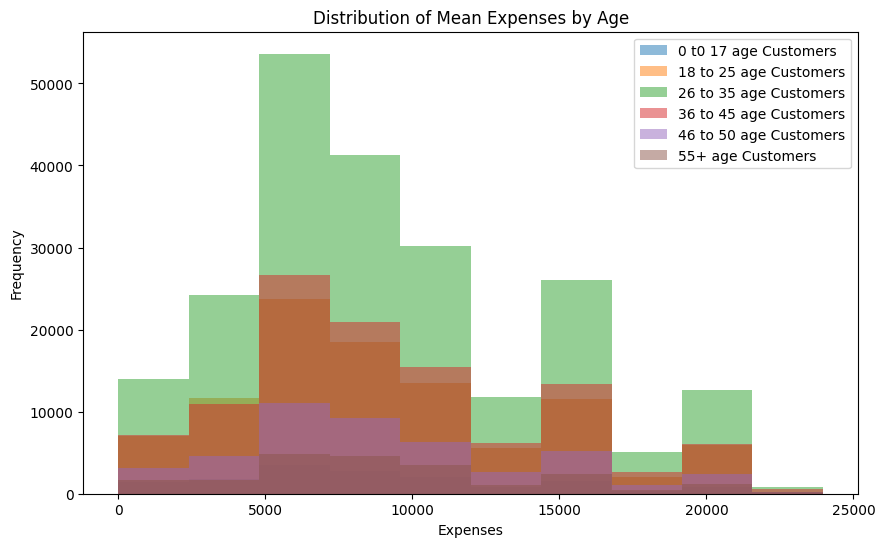

In [103]:
plt.figure(figsize=(10, 6))
plt.hist(df_0_17_purchases["Purchase"], bins=10, alpha=0.5, label='0 t0 17 age Customers')
plt.hist(df_18_25_purchases["Purchase"], bins=10, alpha=0.5, label='18 to 25 age Customers')
plt.hist(df_26_35_purchases["Purchase"], bins=10, alpha=0.5, label='26 to 35 age Customers')
plt.hist(df_36_45_purchases["Purchase"], bins=10, alpha=0.5, label='36 to 45 age Customers')
plt.hist(df_46_50_purchases["Purchase"], bins=10, alpha=0.5, label='46 to 50 age Customers')
plt.hist(df_55plus_purchases["Purchase"], bins=10, alpha=0.5, label='55+ age Customers')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Expenses by Age')
plt.legend()
plt.show()

# 5. Final Insights

## 5.1 Comments on the distribution of the variables and relationship between them

### Comments on Distribution of Variables
#### For Female Customers:
1. The total number of unique User IDs of Female Customers = 1666
2. The total number of unique Product IDs purchased by Female Customers = 3367
3. The total number of unique Age Groups that Female Customers belong to = 7
4. The total number of unique Occupations of Female Customers = 21
5. The total number of unique City Categories that the Female Customers live in = 3
6. The total number of unique years that Female Customers have stayed in a city for = 5
7. The total number of unique Marital Status of Female Customers = 2
8. The total number of unique product categories Female Customers purchased from = 20
9. The smallest amount spent on Purchase made by Female Customers = 12
10. The largest amount spent on Purchase made by Female Customers = 23959
11. The total amount spent on Purchases made by all the Female Customers = 1186232642
12. The average amount spent on Purchases made by Female Customers = 8734.565765155476 

#### For Male Customers:
1. The total number of unique User IDs of Male Customers = 4225
2. The total number of unique Product IDs purchased by Male Customers = 3588
3. The total number of unique Age Groups that Male Customers belong to = 7
4. The total number of unique Occupations of Male Customers = 21
5. The total number of unique City Categories that the Male Customers live in = 3
6. The total number of unique years that Male Customers have stayed in a city for = 5
7. The total number of unique Marital Status of Male Customers = 2
8. The total number of unique product categories that Male Customers purchased from = 20
9. The smallest amount spent on Purchase made by Male Customers = 12
10. The largest amount spent on Purchase made by Male Customers = 23961
11. The total amount spent on Purchases made by all the Male Customers = 3909580100
12. The average amount spent on Purchases made by Male Customers = 9437.526040472265

## Comments on Relationship between the Variables
1. The average amount spent on Purchases is higher is Male Customers compared to Female Customers.
2. The age group of 51 - 55 has the highest of mean amount spent on Purchases compared to other age groups.
3. The customers with occupation 17 have the highest mean amount spent on Purchases.
4. The customers living in City with "C" as category have the highest mean amount spent on purchases.
5. The customers who have stayed is a particular city for 2 years have the highest mean amount spent on purchases.
6. The customers whose marital status is 0 have a greater mean amount spent on purchases.

## 5.2 Comments for each Univariate and Bivariate Plots

#### For Female Customers
1. Most number of Female customers have their occupation 0.
2. Most number of Female customers have their marital status as 0.
3. Most number of Female customers have purchased products from product category 5.
4. Highest amount of purchases made by the Female customers are in the range from 5000 to 10000 purchase amount.
5. Most number of Female customers are from the age group 26 to 35.
6. Most number of Female customers are from city category "B".
7. Most number of Female customers have stayed in city for 2 years.

#### For Male Customers:
1. Most number of Male customers have their occupation 4.
2. Most number of Male customers have their marital status as 0.
3. Most number of Male customers have purchased products from product category 0.
4. Highest amount of purchases made by the Male customers are in the range from 5000 to 10000 purchase amount.
5. Most number of Male customers are from the age group 26 to 35.
6. Most number of Male customers are from city category "B".
7. Most number of Male customers have stayed in city for 1 years.

## 5.3 Comments on different variables when generalizing it for Population

1. Mean amount spent by 5 million Female Customers = 9815.333333333334
2. Mean amount spent by 5 million Male Customers = 10204.133333333333
3. Confidence Interval for Mean Expenses (Female) = (0, 8733.4949)
4. Confidence Interval for Mean Expenses (Male) = (0, 9436.883958)
5. Mean amount spent by 5 million Married Customers =  7970.733333333334
6. Mean amount spent by 5 million Unmarried Customers =  8227.366666666667
7. Confidence Interval for Mean Expenses (married): (0, 9260.719956)
8. Confidence Interval for Mean Expenses (unmarried): (0, 9265.333136)
9. Mean amount spent by customers in the age group of 0 to 17 = 10321.066666666668
10. Mean amount spent by customers in the age group of 18 to 25 = 9862.8
11. Mean amount spent by customers in the age group of 26 to 35 = 10505.633333333333
12. Mean amount spent by customers in the age group of 36 to 45 = 9318.5
13. Mean amount spent by customers in the age group of 46 to 50 = 7985.4
14. Mean amount spent by customers in the age group of 55+ = 7368.2

# 6. Recommendations

1. Target male customers: Since male customers tend to spend more on purchases compared to female customers, it would be beneficial to target marketing and promotional campaigns towards male customers. Tailor your advertising and product offerings to appeal to their preferences and spending patterns.

2. Focus on age group 51-55: The age group of 51-55 has shown the highest average amount spent on purchases. Consider developing specific marketing strategies and promotions targeted at this age group to encourage more sales and engagement.

3. Prioritize product category 5: Since most female customers and male customers have purchased products from category 5, allocate resources and marketing efforts to promote and expand this product category. Enhancing product offerings, providing special discounts, or launching new products within this category can attract more customers and boost sales.

4. Target customers with occupation 17: Customers with occupation 17 have shown the highest average amount spent on purchases. Develop targeted marketing campaigns to reach this specific occupation group. Highlight how your products can meet their needs or offer exclusive promotions to incentivize purchases.

5. Focus on City Category "C": Customers living in City Category "C" have demonstrated the highest average amount spent on purchases. Consider increasing your presence and marketing activities in this particular city category. Understand the preferences and characteristics of customers in City Category "C" to tailor your marketing messages effectively.

6. Encourage customer loyalty: Since customers who have stayed in a particular city for 2 years have shown the highest average amount spent on purchases, implement loyalty programs or incentives to encourage customer retention. Offer rewards, personalized discounts, or exclusive offers to customers who have been with your brand for a longer duration.

7. Consider marital status: Customers with marital status 0 (likely unmarried) tend to spend more on purchases. Develop marketing strategies and product offerings that cater specifically to this segment. Highlight products or services that align with their preferences or offer special deals for unmarried individuals.

8. Optimize pricing strategy: Analyze the purchase amount ranges and identify the pricing sweet spot that aligns with customer spending patterns. Consider adjusting prices or introducing pricing tiers to maximize sales and customer satisfaction.

9. Personalize marketing communications: Leverage the available demographic and behavioral information to personalize marketing communications and offers. By tailoring messages to specific age groups, city categories, or product preferences, you can increase customer engagement and conversion rates.

10. Monitor and track customer preferences: Continuously gather and analyze customer data to identify changing trends and preferences. Keep a close eye on shifts in demographics, purchase patterns, and product category preferences. Use this information to adapt your marketing strategies and optimize your product offerings accordingly.